In [104]:
import os
os.chdir("/data/Image_quantification/")


In [105]:
!ls

GBA1_24h_LPS	 GBA1_7d_aSyn	 KOLF_24h_ctrl	  KOLF_7d_debris
GBA1_24h_aSyn	 GBA1_7d_ctrl	 KOLF_24h_debris  all_images.csv
GBA1_24h_ctrl	 GBA1_7d_debris  KOLF_7d_LPS
GBA1_24h_debris  KOLF_24h_LPS	 KOLF_7d_aSyn
GBA1_7d_LPS	 KOLF_24h_aSyn	 KOLF_7d_ctrl


In [106]:
import pandas as pd
df = pd.read_csv('all_images.csv')
print(f"Data shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Data shape: (1505, 11)

Column names:
['Image', 'Nucleus_ID', 'Centroid_Y', 'Centroid_X', 'Speck_Count', 'Total_Speck_Area', 'Mean_Speck_Intensity', 'IBA1_Intensity', 'MKI67_Intensity', 'MKI67_Positive', 'Condition']

First few rows:


,Image,Nucleus_ID,Centroid_Y,Centroid_X,Speck_Count,Total_Speck_Area,Mean_Speck_Intensity,IBA1_Intensity,MKI67_Intensity,MKI67_Positive,Condition
0,KOLF2.1J_WT iMIcs_24h_Control_DAPImsLAMP1-488g...,1,37.648305,671.491525,0,0.0,0.0,604.359890,367.288136,0,KOLF_24h_ctrl
1,KOLF2.1J_WT iMIcs_24h_Control_DAPImsLAMP1-488g...,2,40.188679,657.031447,0,0.0,0.0,608.153846,311.779874,0,KOLF_24h_ctrl
2,KOLF2.1J_WT iMIcs_24h_Control_DAPImsLAMP1-488g...,3,40.075843,885.050562,0,0.0,0.0,418.757576,366.825843,0,KOLF_24h_ctrl
3,KOLF2.1J_WT iMIcs_24h_Control_DAPImsLAMP1-488g...,4,81.218750,850.125000,0,0.0,0.0,481.137778,341.058036,0,KOLF_24h_ctrl
4,KOLF2.1J_WT iMIcs_24h_Control_DAPImsLAMP1-488g...,5,94.018018,1996.013514,0,0.0,0.0,744.972057,663.460746,0,KOLF_24h_ctrl


In [112]:
print(f"Total cells: {len(df)}")
print(f"Conditions: {df['Condition'].value_counts()}")
print(f"Data summary:")
df.describe()

Total cells: 1505
Conditions: Condition
KOLF_7d_LPS        194
KOLF_24h_debris    167
KOLF_7d_debris     162
KOLF_7d_ctrl       157
KOLF_24h_LPS       149
KOLF_7d_aSyn       147
KOLF_24h_aSyn      132
KOLF_24h_ctrl       90
GBA1_7d_ctrl        60
GBA1_7d_LPS         52
GBA1_7d_debris      44
GBA1_24h_LPS        39
GBA1_7d_aSyn        33
GBA1_24h_debris     28
GBA1_24h_ctrl       26
GBA1_24h_aSyn       25
Name: count, dtype: int64
Data summary:


,Nucleus_ID,Centroid_Y,Centroid_X,Speck_Count,Total_Speck_Area,Mean_Speck_Intensity,IBA1_Intensity,MKI67_Intensity,MKI67_Positive
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,66.508970,1155.535300,1199.219646,1.185382,1118.080399,799.804273,2796.595038,1970.694437,0.104319
std,48.269813,655.709937,643.190404,1.379292,2309.680436,711.920911,3760.802354,4511.570695,0.305775
min,1.000000,2.153846,6.246835,0.000000,0.000000,0.000000,210.150000,190.370079,0.000000
25%,24.000000,594.076213,644.780952,0.000000,0.000000,0.000000,686.051202,485.131387,0.000000
50%,57.000000,1156.317862,1199.825778,1.000000,44.000000,930.741557,1179.871447,686.460823,0.000000
75%,105.000000,1729.131579,1754.000992,2.000000,1322.000000,1295.648780,3324.089423,1167.305305,0.000000
max,194.000000,2299.321429,2301.839506,9.000000,23932.000000,3844.765755,29514.436156,43908.889427,1.000000


In [13]:
df[['Genotype', 'Timepoint', 'Treatment']] = df['Condition'].str.split('_', expand=True)

In [89]:
import shutil

path = "/data/Image_quantification"   
total, used, free = shutil.disk_usage(path)

print(f"Total: {total // (1024**3)} GB")
print(f"Used: {used // (1024**3)} GB")
print(f"Free: {free // (1024**3)} GB")


Total: 4730 GB
Used: 4114 GB
Free: 377 GB


Data loaded: 1505 cells across 16 conditions

Sample distribution:
Treatment           LPS  aSyn  ctrl  debris
Genotype Timepoint                         
GBA1     24h         39    25    26      28
         7d          52    33    60      44
KOLF     24h        149   132    90     167
         7d         194   147   157     162
=== COMPLETE GBA1 MICROGLIA ANALYSIS ===

=== BASIC STATISTICS ===

Feature Summary (all cells):
       Speck_Count  Total_Speck_Area  Mean_Speck_Intensity  IBA1_Intensity  \
count      1505.00           1505.00               1505.00         1505.00   
mean          1.19           1118.08                799.80         2796.60   
std           1.38           2309.68                711.92         3760.80   
min           0.00              0.00                  0.00          210.15   
25%           0.00              0.00                  0.00          686.05   
50%           1.00             44.00                930.74         1179.87   
75%           2.00        

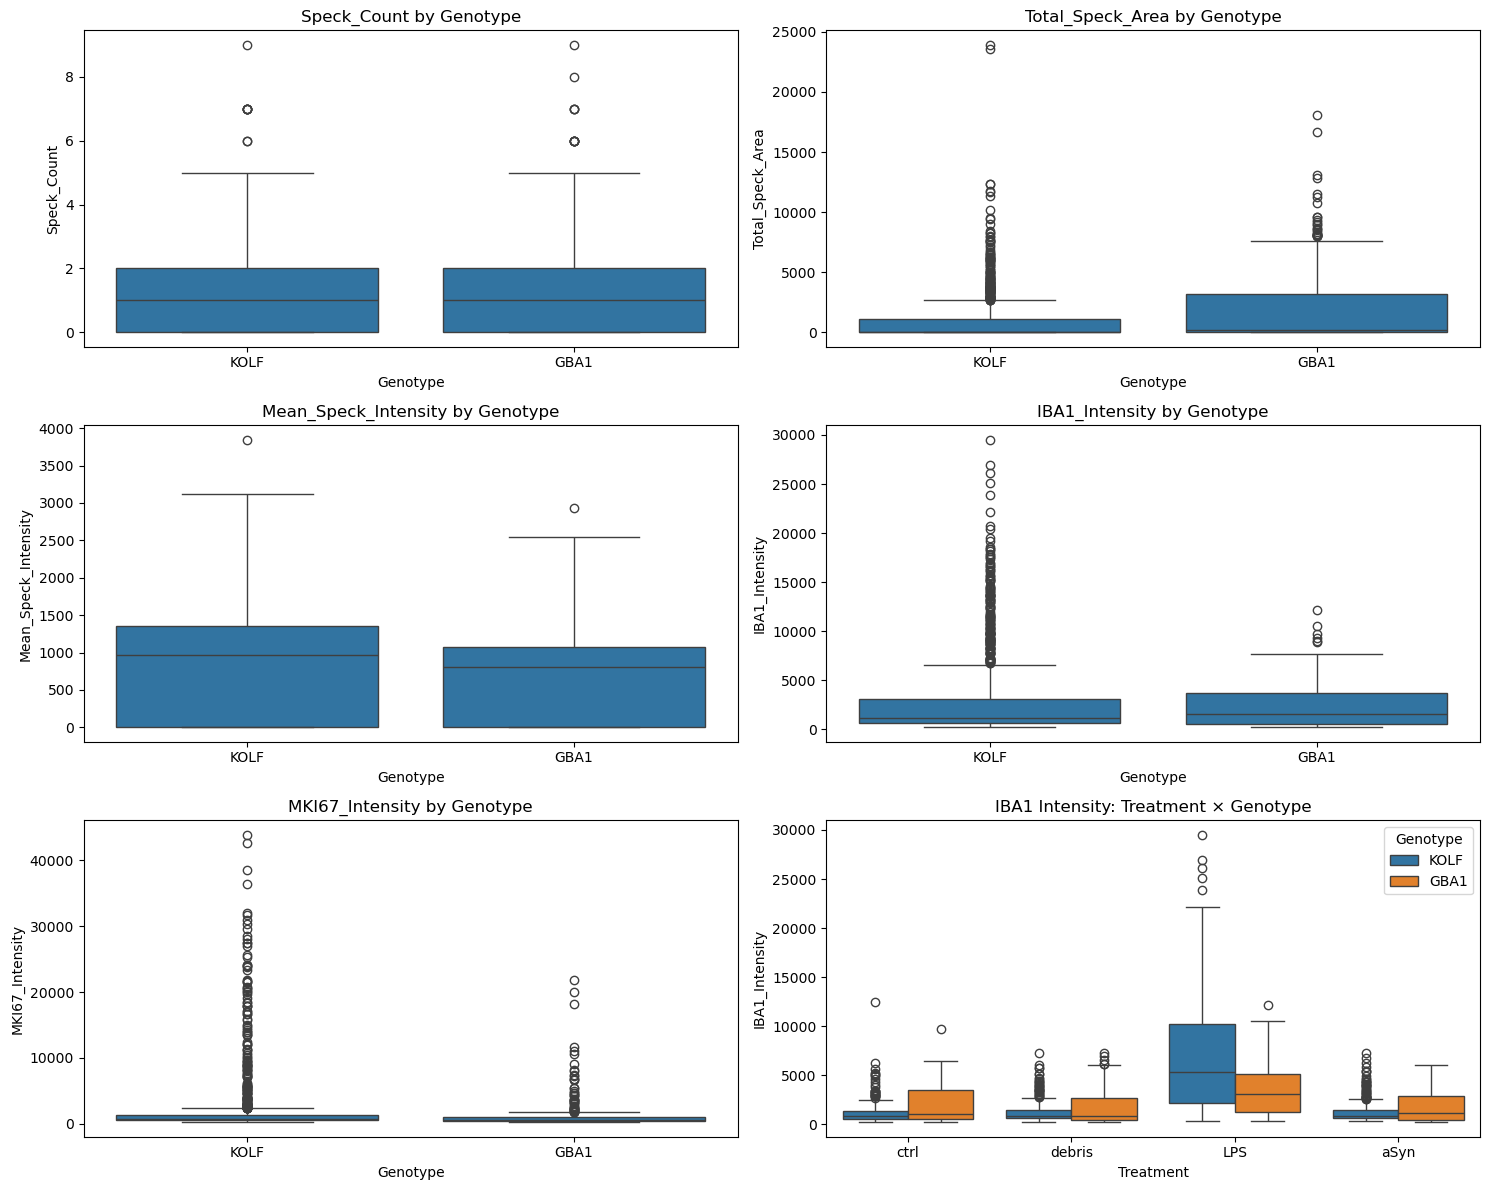

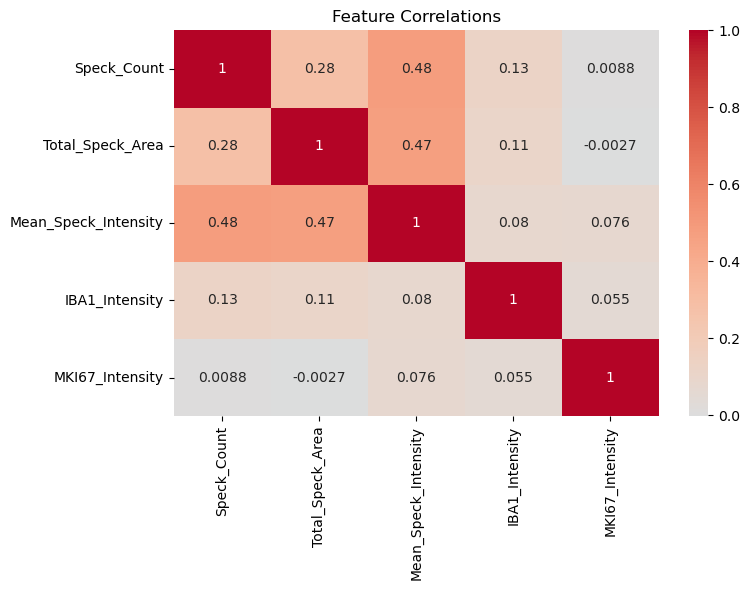


=== ADVANCED CLASSIFICATION MODELS ===

--- Treatment Prediction ---

Feature Importance for Treatment (Random Forest):
                feature  importance
3        IBA1_Intensity      0.4087
4       MKI67_Intensity      0.2014
2  Mean_Speck_Intensity      0.1813
1      Total_Speck_Area      0.1584
0           Speck_Count      0.0502


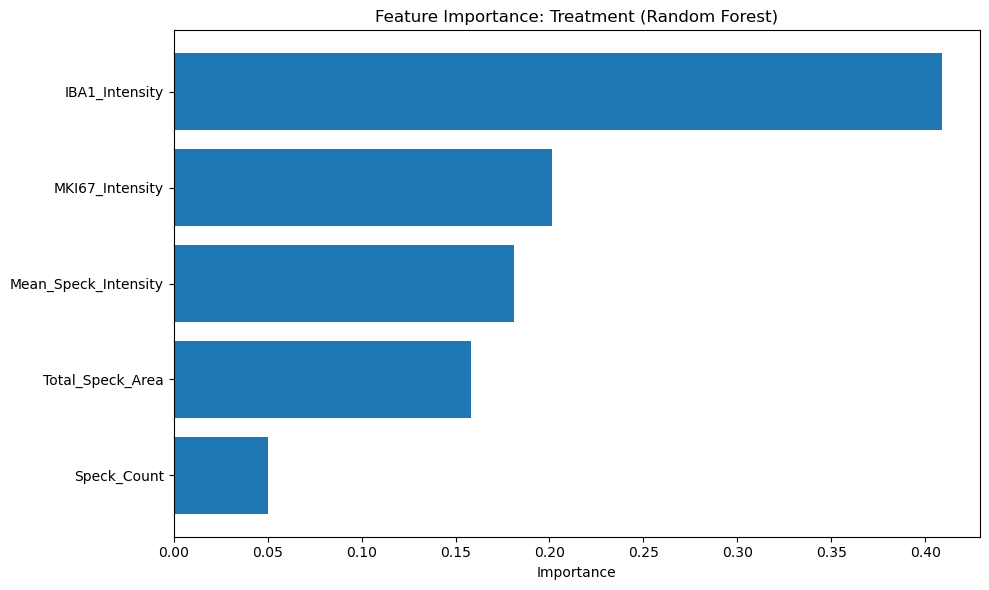

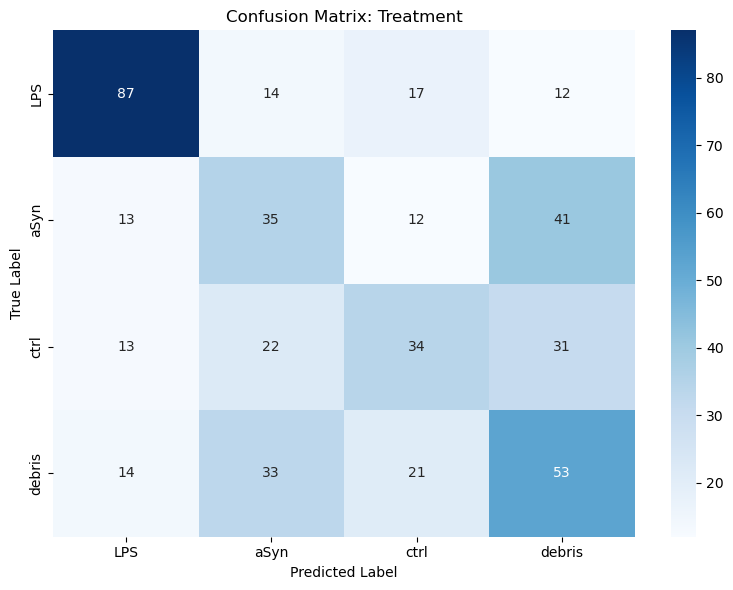


--- Genotype Prediction ---

Feature Importance for Genotype (Random Forest):
                feature  importance
2  Mean_Speck_Intensity      0.2636
3        IBA1_Intensity      0.2470
4       MKI67_Intensity      0.2169
1      Total_Speck_Area      0.2126
0           Speck_Count      0.0600


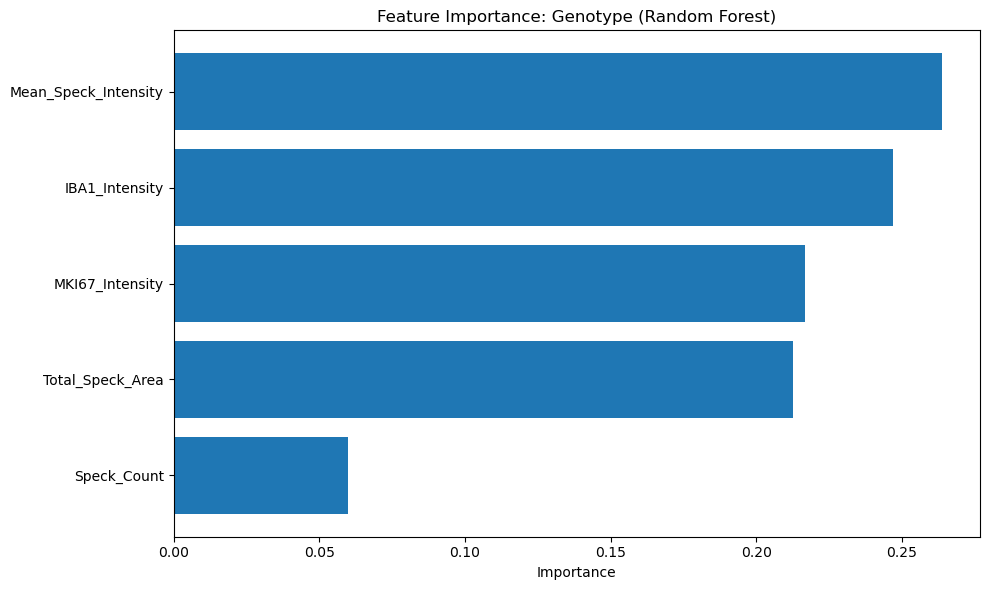

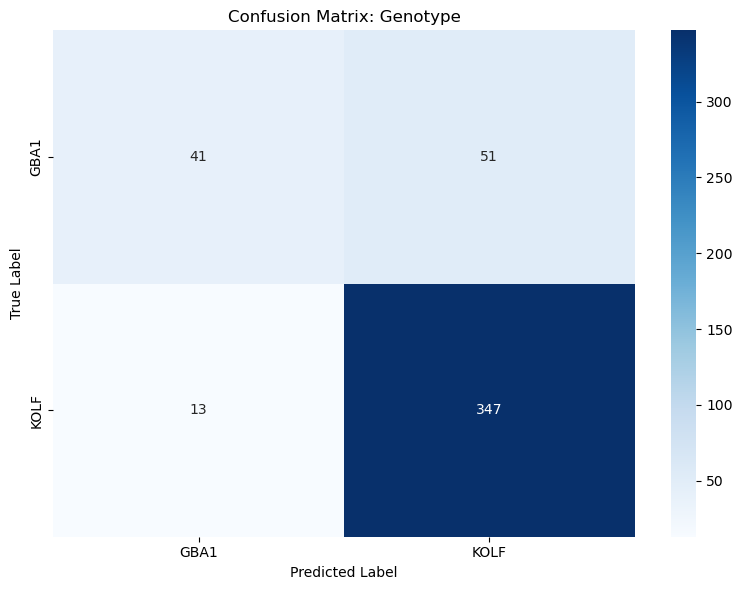


--- Timepoint Prediction ---

Feature Importance for Timepoint (Random Forest):
                feature  importance
2  Mean_Speck_Intensity      0.2637
3        IBA1_Intensity      0.2596
4       MKI67_Intensity      0.2370
1      Total_Speck_Area      0.1853
0           Speck_Count      0.0544


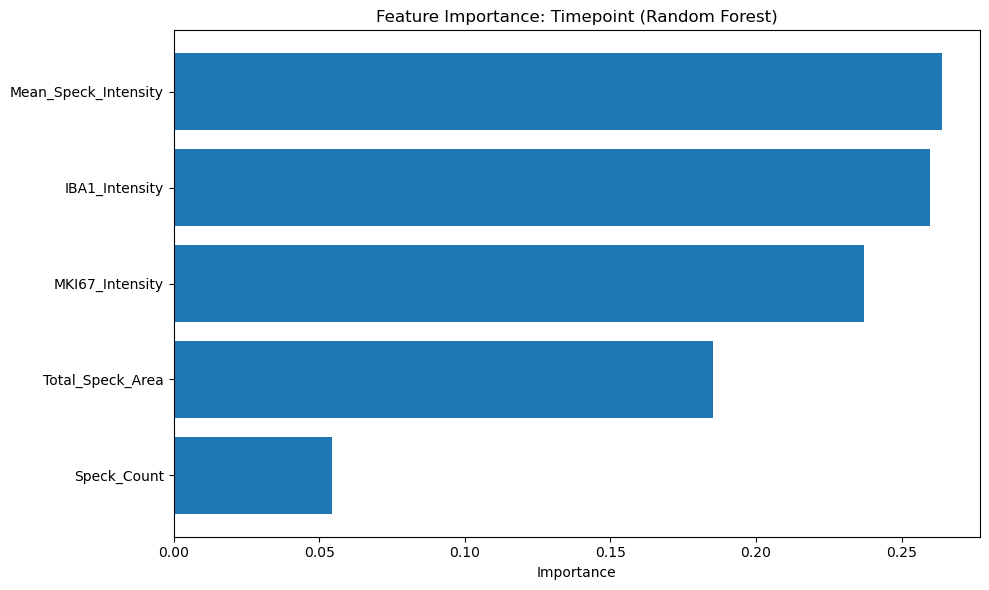

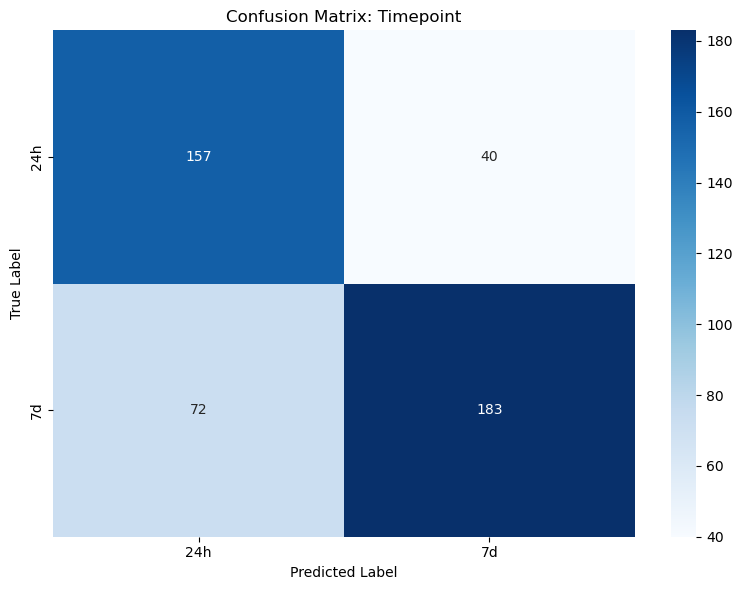


--- MKI67_Status Prediction ---

Feature Importance for MKI67_Status (XGBoost):
                feature  importance
4       MKI67_Intensity      0.6172
0           Speck_Count      0.1271
2  Mean_Speck_Intensity      0.1003
1      Total_Speck_Area      0.0878
3        IBA1_Intensity      0.0676


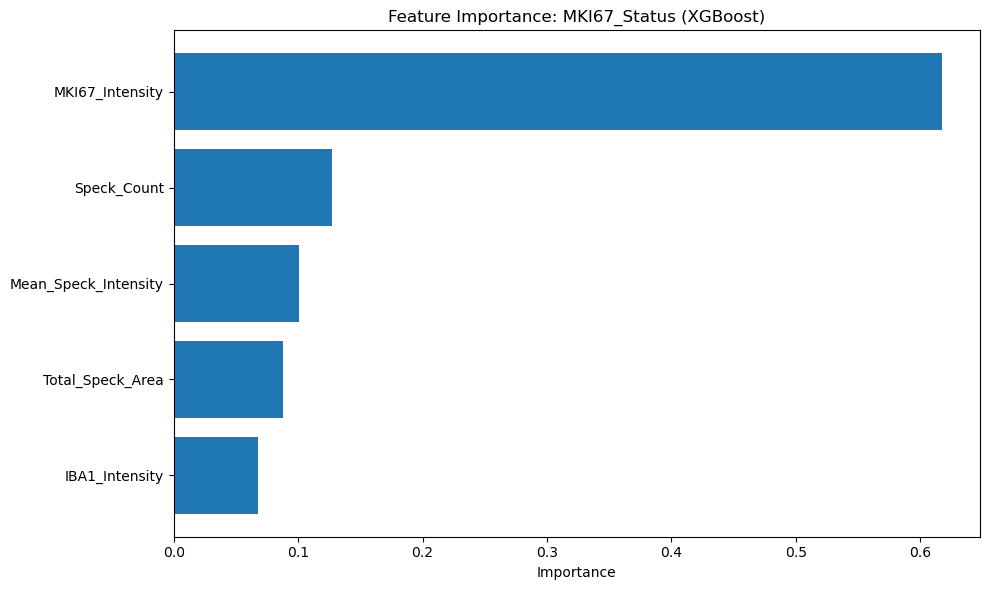

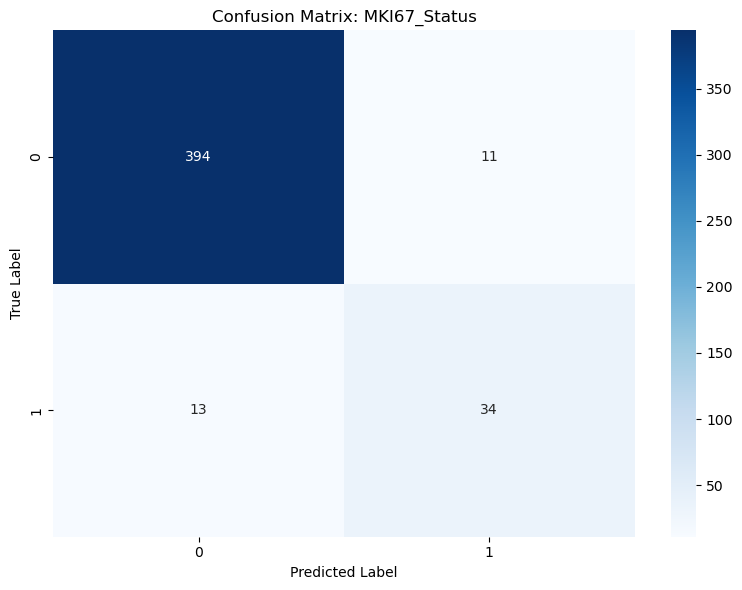


=== DIMENSIONALITY REDUCTION (UMAP) ===


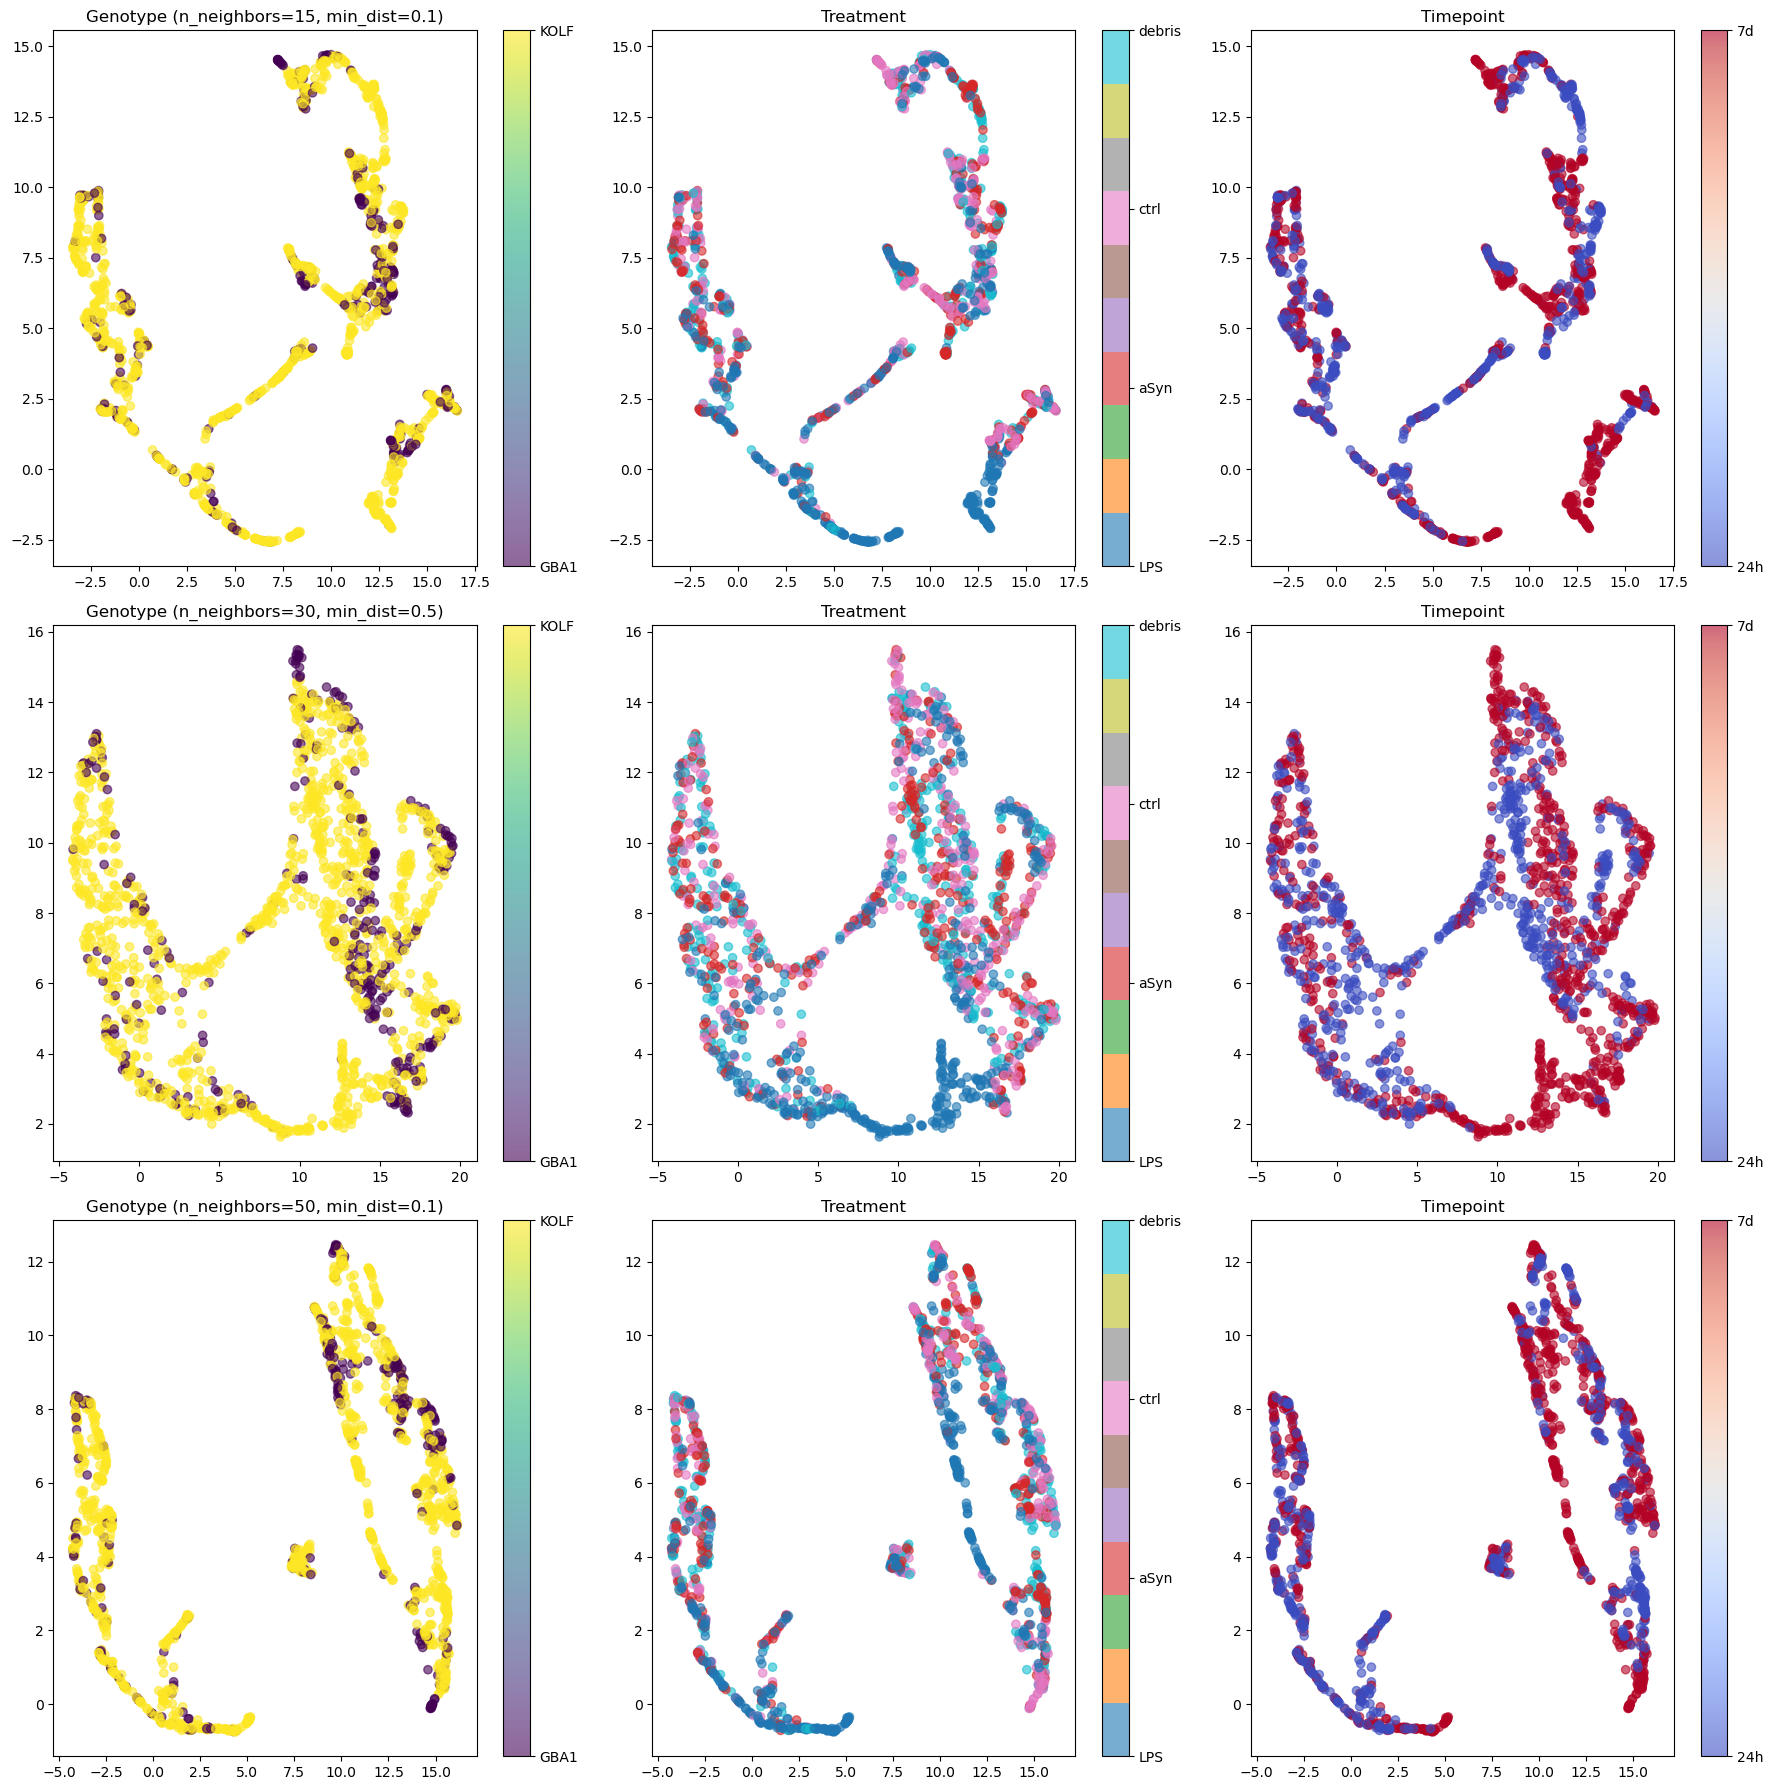


Feature correlations with UMAP dimensions:
                feature  UMAP1_corr  UMAP2_corr  total_corr
2  Mean_Speck_Intensity       0.809       0.342       0.879
0           Speck_Count       0.683      -0.124       0.694
3        IBA1_Intensity       0.232      -0.469       0.524
1      Total_Speck_Area       0.410       0.082       0.418
4       MKI67_Intensity       0.022      -0.136       0.138


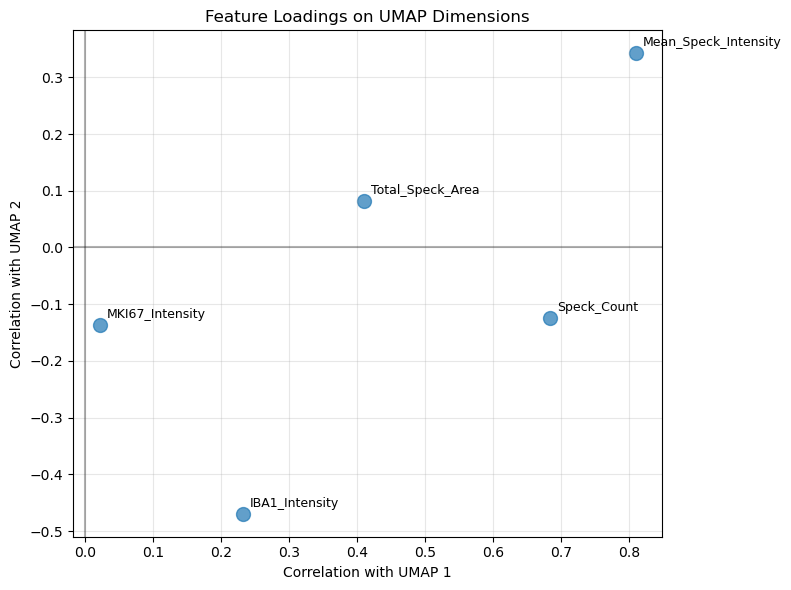


=== ANALYSIS COMPLETE ===


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, kruskal
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    UMAP_AVAILABLE = False
    print("UMAP not available. Install with: pip install umap-learn")
import warnings
warnings.filterwarnings('ignore')


class GBA1MicrogliaAnalysis:
    def __init__(self, csv_file):
        """Load and prepare CellProfiler data"""
        self.df = pd.read_csv(csv_file)
        self.prepare_data()
        
    def prepare_data(self):
        """Parse conditions and prepare feature columns"""
        condition_parts = self.df['Condition'].str.split('_', expand=True)
        self.df['Genotype'] = condition_parts[0]
        self.df['Timepoint'] = condition_parts[1]
        self.df['Treatment'] = condition_parts[2]
        
        self.feature_cols = ['Speck_Count', 'Total_Speck_Area', 'Mean_Speck_Intensity',
                             'IBA1_Intensity', 'MKI67_Intensity']
        
        print(f"Data loaded: {len(self.df)} cells across {self.df['Condition'].nunique()} conditions")
        print("\nSample distribution:")
        print(self.df.groupby(['Genotype', 'Timepoint', 'Treatment']).size().unstack(fill_value=0))
    
    def basic_statistics(self):
        print("\n=== BASIC STATISTICS ===")
        print("\nFeature Summary (all cells):")
        summary = self.df[self.feature_cols].describe()
        print(summary.round(2))
        
        print("\nBy Genotype:")
        genotype_stats = self.df.groupby('Genotype')[self.feature_cols].agg(['mean', 'std']).round(2)
        print(genotype_stats)
        return summary, genotype_stats
    
    def compare_genotypes(self, alpha=0.05):
        print("\n=== GENOTYPE COMPARISON (GBA1 vs KOLF) ===")
        results = {}
        gba1_data = self.df[self.df['Genotype'] == 'GBA1']
        kolf_data = self.df[self.df['Genotype'] == 'KOLF']
        
        for feature in self.feature_cols:
            gba1_values = gba1_data[feature].dropna()
            kolf_values = kolf_data[feature].dropna()
            
            if len(gba1_values) > 10 and len(kolf_values) > 10:
                statistic, p_value = mannwhitneyu(gba1_values, kolf_values, alternative='two-sided')
                test_type = "Mann-Whitney U"
            else:
                statistic, p_value = ttest_ind(gba1_values, kolf_values)
                test_type = "t-test"
            
            pooled_std = np.sqrt(((len(gba1_values)-1)*gba1_values.var() + (len(kolf_values)-1)*kolf_values.var()) /
                                 (len(gba1_values) + len(kolf_values) - 2))
            cohens_d = (gba1_values.mean() - kolf_values.mean()) / pooled_std if pooled_std > 0 else 0
            
            results[feature] = {
                'GBA1_mean': gba1_values.mean(),
                'KOLF_mean': kolf_values.mean(),
                'p_value': p_value,
                'significant': p_value < alpha,
                'cohens_d': cohens_d,
                'test': test_type
            }
            
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            print(f"\n{feature}: GBA1={gba1_values.mean():.2f} ± {gba1_values.std():.2f}, "
                  f"KOLF={kolf_values.mean():.2f} ± {kolf_values.std():.2f}, "
                  f"p={p_value:.4f} {significance} ({test_type}), Cohen's d={cohens_d:.3f}")
        return results
    
    def compare_treatments(self, alpha=0.05):
        print("\n=== TREATMENT COMPARISON ===")
        results = {}
        for genotype in ['GBA1', 'KOLF']:
            print(f"\n--- {genotype} Treatment Effects ---")
            genotype_data = self.df[self.df['Genotype'] == genotype]
            results[genotype] = {}
            
            for feature in self.feature_cols:
                treatment_groups = [group[feature].dropna().values 
                                    for name, group in genotype_data.groupby('Treatment')]
                if len(treatment_groups) > 1:
                    h_stat, p_value = kruskal(*treatment_groups)
                    results[genotype][feature] = p_value
                    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                    print(f"  {feature}: p = {p_value:.4f} {significance}")
                    treatment_means = genotype_data.groupby('Treatment')[feature].mean()
                    print(f"    Means: {treatment_means.round(2).to_dict()}")
        return results
    
    def visualize_comparisons(self, figsize=(15,12)):
        fig, axes = plt.subplots(3,2,figsize=figsize)
        axes = axes.flatten()
        for i, feature in enumerate(self.feature_cols):
            sns.boxplot(data=self.df, x='Genotype', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} by Genotype')
        sns.boxplot(data=self.df, x='Treatment', y='IBA1_Intensity', hue='Genotype', ax=axes[5])
        axes[5].set_title('IBA1 Intensity: Treatment × Genotype')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(8,6))
        correlation_matrix = self.df[self.feature_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlations')
        plt.tight_layout()
        plt.show()
    
    # === ADVANCED CLASSIFICATION METHODS ===
    def build_advanced_classification_models(self):
        print("\n=== ADVANCED CLASSIFICATION MODELS ===")
        X = self.df[self.feature_cols].fillna(0)
        prediction_tasks = {
            'Treatment': self.df['Treatment'],
            'Genotype': self.df['Genotype'],
            'Timepoint': self.df['Timepoint'],
            'MKI67_Status': self.df['MKI67_Positive'] if 'MKI67_Positive' in self.df.columns else None
        }
        all_results = {}
        for task_name, y in prediction_tasks.items():
            if y is None:
                continue
            print(f"\n--- {task_name} Prediction ---")
            if y.dtype == 'object':
                le = LabelEncoder()
                y_encoded = le.fit_transform(y)
                class_names = le.classes_
            else:
                y_encoded = y
                class_names = None
            unique, counts = np.unique(y_encoded, return_counts=True)
            if len(unique) < 2 or min(counts) < 5:
                print(f"Skipping {task_name}: insufficient data")
                continue
            task_results = self._train_advanced_models(X, y_encoded, task_name, class_names)
            all_results[task_name] = task_results
        return all_results
    
    def _train_advanced_models(self, X, y, task_name, class_names):
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        except ValueError:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced'),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
        }
        if XGBOOST_AVAILABLE:
            models['XGBoost'] = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42,
                                                 eval_metric='logloss' if len(np.unique(y))>2 else 'error')
        results = {}
        best_model = None
        best_score = 0
        for name, model in models.items():
            try:
                cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                test_score = model.score(X_test_scaled, y_test)
                results[name] = {'model': model, 'scaler': scaler, 'cv_mean': cv_scores.mean(), 
                                 'cv_std': cv_scores.std(), 'test_score': test_score, 'predictions': y_pred}
                if test_score > best_score:
                    best_score = test_score
                    best_model = (name, model, scaler)
            except Exception as e:
                print(f"Error training {name}: {e}")
        
        if best_model:
            self._analyze_feature_importance(best_model, task_name, class_names)
            if len(np.unique(y)) <= 10:
                self._plot_confusion_matrix(y_test, results[best_model[0]]['predictions'], task_name, class_names)
        return results
    
    def _analyze_feature_importance(self, best_model, task_name, class_names):
        name, model, scaler = best_model
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importance = np.abs(model.coef_).mean(axis=0) if len(model.coef_.shape)>1 else np.abs(model.coef_)
        else:
            return
        feature_df = pd.DataFrame({'feature': self.feature_cols, 'importance': importance}).sort_values('importance', ascending=False)
        print(f"\nFeature Importance for {task_name} ({name}):")
        print(feature_df.round(4))
        plt.figure(figsize=(10,6))
        plt.barh(range(len(feature_df)), feature_df['importance'])
        plt.yticks(range(len(feature_df)), feature_df['feature'])
        plt.gca().invert_yaxis()
        plt.xlabel('Importance')
        plt.title(f'Feature Importance: {task_name} ({name})')
        plt.tight_layout()
        plt.show()
        return feature_df
    
    def _plot_confusion_matrix(self, y_true, y_pred, task_name, class_names):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names if class_names is not None else range(len(cm)),
                    yticklabels=class_names if class_names is not None else range(len(cm)))
        plt.title(f'Confusion Matrix: {task_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

    # === Dimensionality Reduction ===
    def dimensionality_reduction(self, method='umap'):
        print(f"\n=== DIMENSIONALITY REDUCTION ({method.upper()}) ===")
        X = self.df[self.feature_cols].fillna(0)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        if method == 'umap' and UMAP_AVAILABLE:
            return self._run_umap_analysis(X_scaled)
        else:
            return self._run_tsne_analysis(X_scaled)
    
    def _run_umap_analysis(self, X_scaled):
        param_sets = [
            {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'euclidean'},
            {'n_neighbors': 30, 'min_dist': 0.5, 'metric': 'euclidean'},
            {'n_neighbors': 50, 'min_dist': 0.1, 'metric': 'cosine'}
        ]
        
        fig, axes = plt.subplots(len(param_sets), 3, figsize=(18, 6*len(param_sets)))
        if len(param_sets) == 1:
            axes = axes.reshape(1, -1)
        umap_results = {}
        
        for i, params in enumerate(param_sets):
            reducer = umap.UMAP(n_components=2, random_state=42, **params)
            X_umap = reducer.fit_transform(X_scaled)
            umap_results[i] = {'embedding': X_umap, 'params': params}
            
            # Genotype
            genotype_colors = LabelEncoder().fit_transform(self.df['Genotype'])
            scatter1 = axes[i,0].scatter(X_umap[:,0], X_umap[:,1], c=genotype_colors, cmap='viridis', alpha=0.6)
            axes[i,0].set_title(f'Genotype (n_neighbors={params["n_neighbors"]}, min_dist={params["min_dist"]})')
            plt.colorbar(scatter1, ax=axes[i,0], ticks=[0,1], format=plt.FuncFormatter(lambda val, loc: ['GBA1','KOLF'][int(val)]))
            
            # Treatment
            treatment_colors = LabelEncoder().fit_transform(self.df['Treatment'])
            scatter2 = axes[i,1].scatter(X_umap[:,0], X_umap[:,1], c=treatment_colors, cmap='tab10', alpha=0.6)
            axes[i,1].set_title('Treatment')
            treatments = sorted(self.df['Treatment'].unique())
            plt.colorbar(scatter2, ax=axes[i,1], ticks=range(len(treatments)), format=plt.FuncFormatter(lambda val, loc: treatments[int(val)]))
            
            # Timepoint
            timepoint_colors = LabelEncoder().fit_transform(self.df['Timepoint'])
            scatter3 = axes[i,2].scatter(X_umap[:,0], X_umap[:,1], c=timepoint_colors, cmap='coolwarm', alpha=0.6)
            axes[i,2].set_title('Timepoint')
            timepoints = sorted(self.df['Timepoint'].unique())
            plt.colorbar(scatter3, ax=axes[i,2], ticks=range(len(timepoints)), format=plt.FuncFormatter(lambda val, loc: timepoints[int(val)]))
        
        plt.tight_layout()
        plt.show()
        
        # Analyze feature contributions
        self._analyze_umap_features(X_scaled, umap_results[0]['embedding'])
        return umap_results
    
    def _analyze_umap_features(self, X_scaled, embedding):
        correlations = []
        for i, feature in enumerate(self.feature_cols):
            corr_umap1 = np.corrcoef(X_scaled[:, i], embedding[:, 0])[0,1]
            corr_umap2 = np.corrcoef(X_scaled[:, i], embedding[:, 1])[0,1]
            correlations.append({'feature': feature, 'UMAP1_corr': corr_umap1, 'UMAP2_corr': corr_umap2, 
                                 'total_corr': np.sqrt(corr_umap1**2 + corr_umap2**2)})
        corr_df = pd.DataFrame(correlations).sort_values('total_corr', ascending=False)
        print("\nFeature correlations with UMAP dimensions:")
        print(corr_df.round(3))
        
        plt.figure(figsize=(8,6))
        plt.scatter(corr_df['UMAP1_corr'], corr_df['UMAP2_corr'], s=100, alpha=0.7)
        for _, row in corr_df.iterrows():
            plt.annotate(row['feature'], (row['UMAP1_corr'], row['UMAP2_corr']), xytext=(5,5), textcoords='offset points', fontsize=9)
        plt.xlabel('Correlation with UMAP 1')
        plt.ylabel('Correlation with UMAP 2')
        plt.title('Feature Loadings on UMAP Dimensions')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()
        return corr_df
    
    def _run_tsne_analysis(self, X_scaled):
        pca = PCA(n_components=min(len(self.feature_cols),50))
        X_pca = pca.fit_transform(X_scaled)
        perplexities = [30,50] if len(X_scaled)>100 else [min(30,len(X_scaled)//4)]
        fig, axes = plt.subplots(len(perplexities), 2, figsize=(12,5*len(perplexities)))
        if len(perplexities)==1:
            axes = axes.reshape(1,-1)
        tsne_results = {}
        for i, perplexity in enumerate(perplexities):
            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000, learning_rate='auto', init='pca')
            X_tsne = tsne.fit_transform(X_pca)
            tsne_results[perplexity] = X_tsne
            # Genotype
            genotype_colors = LabelEncoder().fit_transform(self.df['Genotype'])
            axes[i,0].scatter(X_tsne[:,0], X_tsne[:,1], c=genotype_colors, cmap='viridis', alpha=0.6)
            axes[i,0].set_title(f't-SNE: Genotype (perplexity={perplexity})')
            # Treatment
            treatment_colors = LabelEncoder().fit_transform(self.df['Treatment'])
            axes[i,1].scatter(X_tsne[:,0], X_tsne[:,1], c=treatment_colors, cmap='tab10', alpha=0.6)
            axes[i,1].set_title(f't-SNE: Treatment (perplexity={perplexity})')
        plt.tight_layout()
        plt.show()
        return tsne_results, pca
    
    # === Complete Analysis ===
    def run_complete_analysis(self):
        print("=== COMPLETE GBA1 MICROGLIA ANALYSIS ===")
        self.basic_statistics()
        genotype_results = self.compare_genotypes()
        treatment_results = self.compare_treatments()
        self.visualize_comparisons()
        self.build_advanced_classification_models()
        dim_red_results = self.dimensionality_reduction(method='umap')
        print("\n=== ANALYSIS COMPLETE ===")
        return {
            'genotype_comparison': genotype_results,
            'treatment_comparison': treatment_results,
            'dimensionality_reduction': dim_red_results
        }


# === Usage Example ===
if __name__ == "__main__":
    analyzer = GBA1MicrogliaAnalysis('all_images.csv')
    results = analyzer.run_complete_analysis()



In [44]:
# Group by treatment and calculate mean ± std
treatment_means = df.groupby('Treatment')['IBA1_Intensity'].agg(['mean', 'std'])
print(treatment_means)


                  mean          std
Treatment                          
LPS        6180.474931  5313.159385
aSyn       1439.463254  1311.270696
ctrl       1487.139711  1545.571425
debris     1362.176487  1314.762706


In [45]:
from scipy.stats import kruskal

groups = [group['IBA1_Intensity'].values for name, group in df.groupby('Treatment')]
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H={h_stat:.3f}, p={p_value:.3e}")


Kruskal-Wallis H=482.903, p=2.419e-104


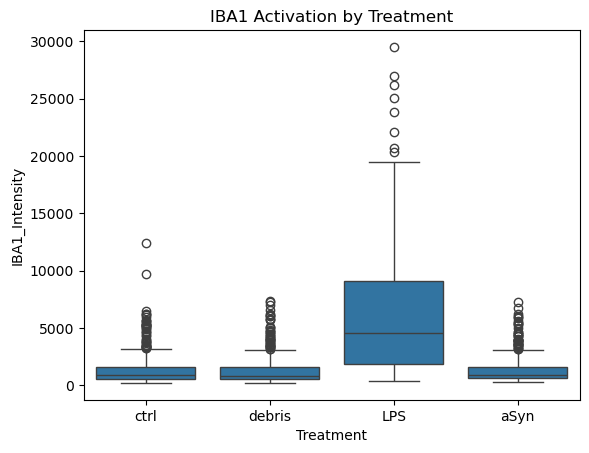

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Treatment', y='IBA1_Intensity')
plt.title('IBA1 Activation by Treatment')
plt.show()



=== ADVANCED CLASSIFICATION MODELS ===

--- Treatment Prediction ---

Feature Importance for Treatment (Random Forest):
                feature  importance
3        IBA1_Intensity      0.4087
4       MKI67_Intensity      0.2014
2  Mean_Speck_Intensity      0.1813
1      Total_Speck_Area      0.1584
0           Speck_Count      0.0502


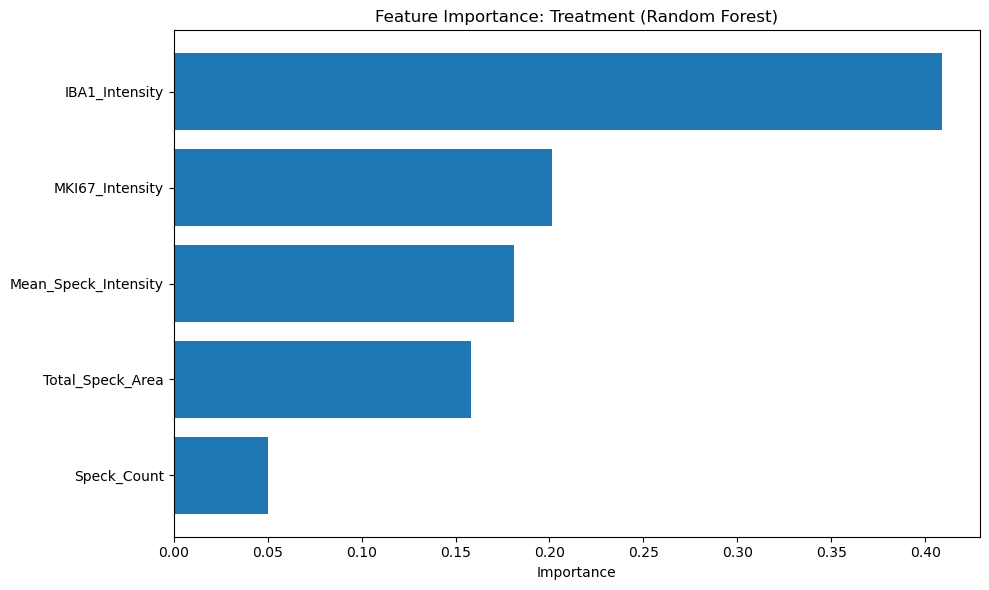

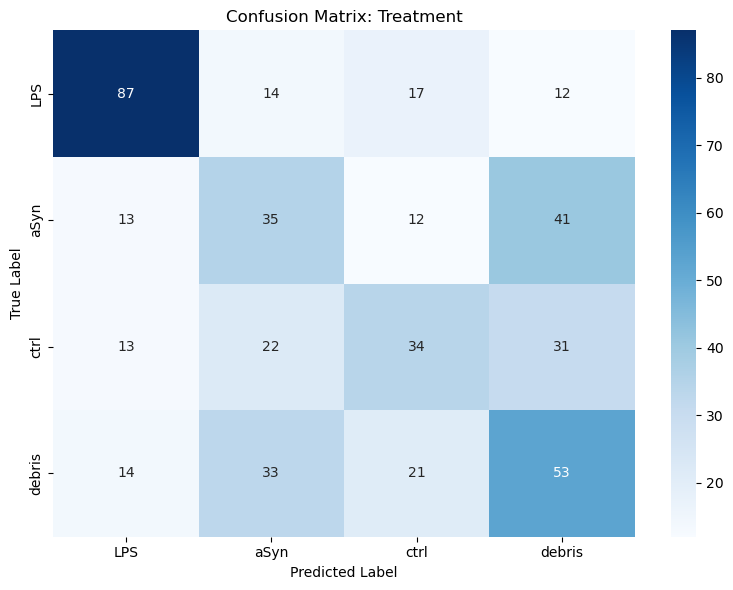


--- Genotype Prediction ---

Feature Importance for Genotype (Random Forest):
                feature  importance
2  Mean_Speck_Intensity      0.2636
3        IBA1_Intensity      0.2470
4       MKI67_Intensity      0.2169
1      Total_Speck_Area      0.2126
0           Speck_Count      0.0600


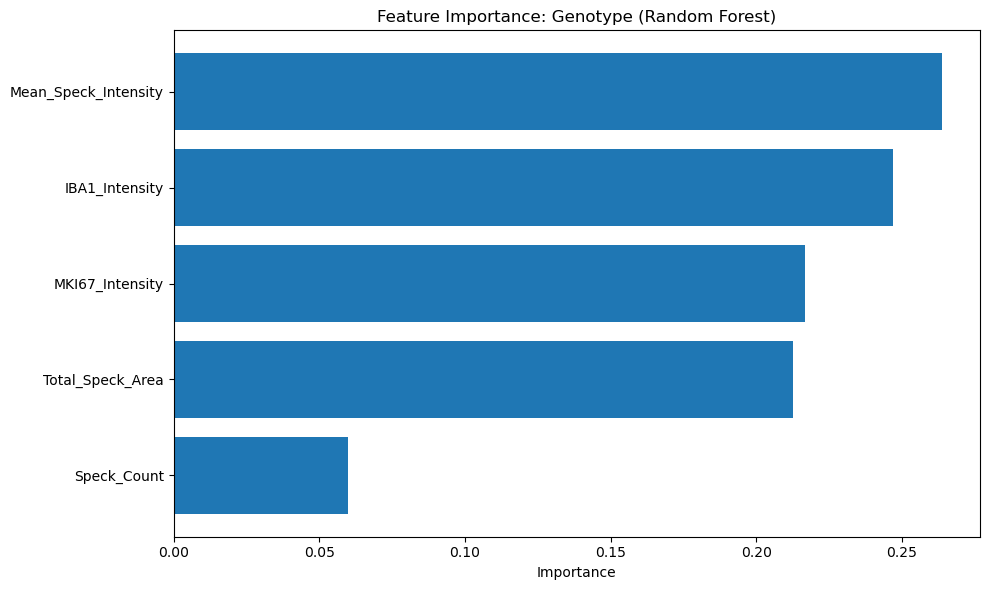

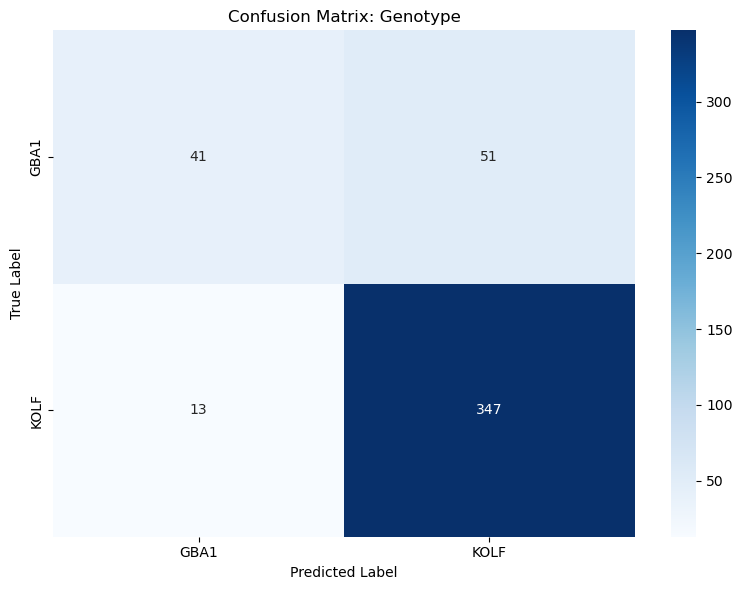


--- Timepoint Prediction ---

Feature Importance for Timepoint (Random Forest):
                feature  importance
2  Mean_Speck_Intensity      0.2637
3        IBA1_Intensity      0.2596
4       MKI67_Intensity      0.2370
1      Total_Speck_Area      0.1853
0           Speck_Count      0.0544


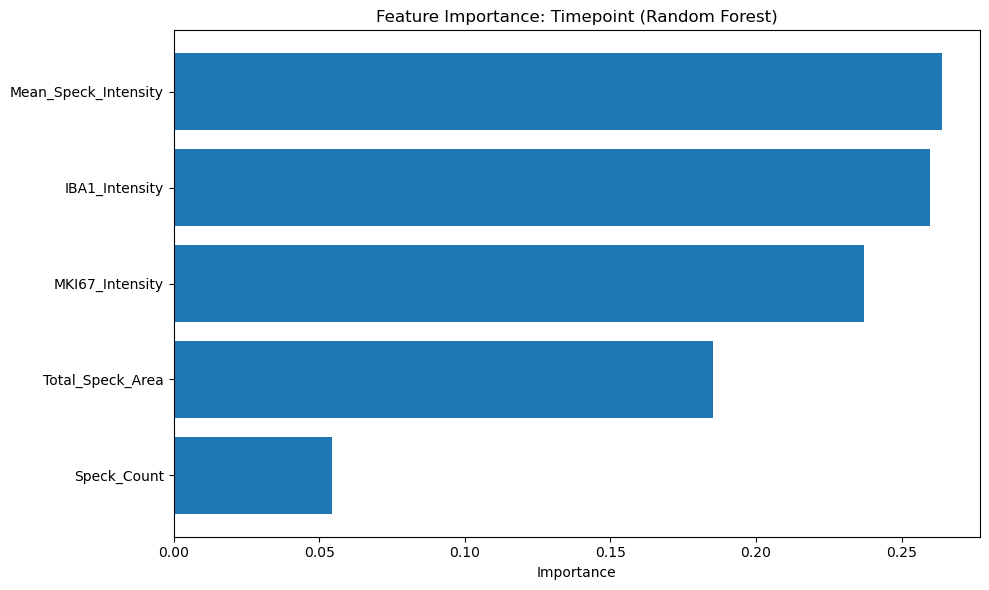

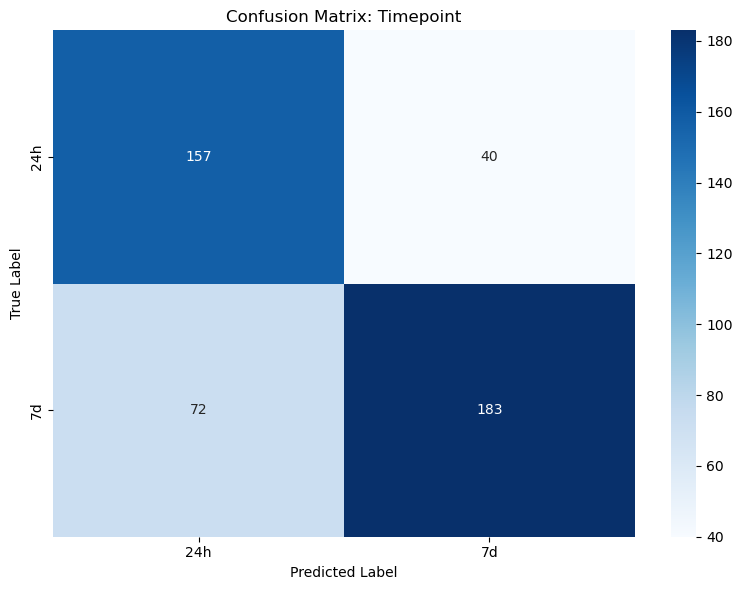


--- MKI67_Status Prediction ---

Feature Importance for MKI67_Status (XGBoost):
                feature  importance
4       MKI67_Intensity      0.6172
0           Speck_Count      0.1271
2  Mean_Speck_Intensity      0.1003
1      Total_Speck_Area      0.0878
3        IBA1_Intensity      0.0676


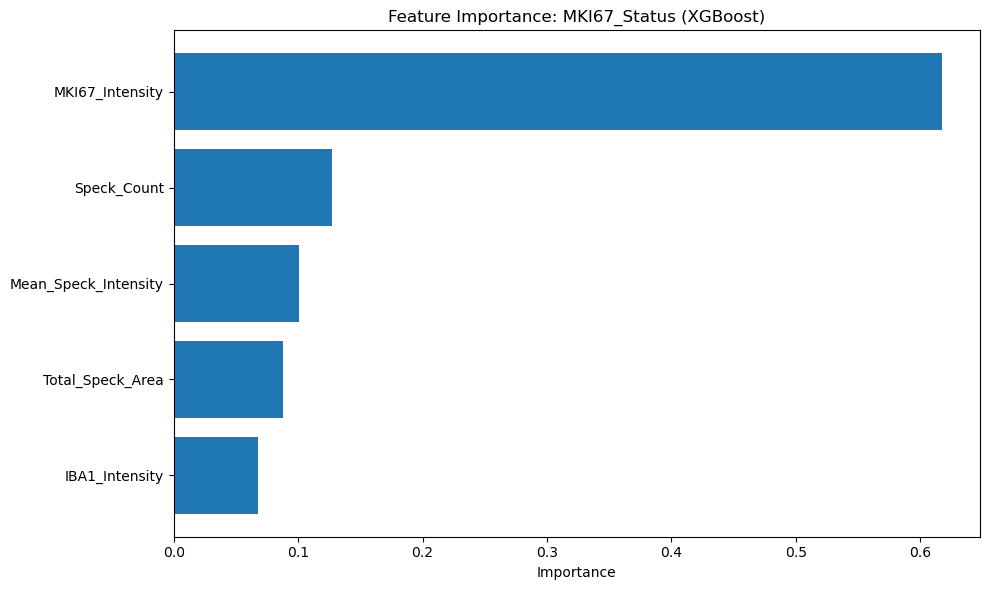

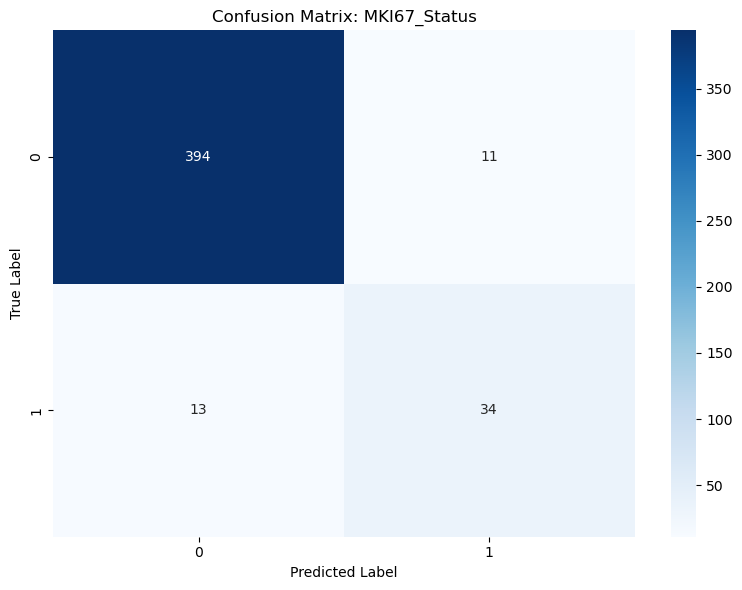

In [52]:
# Use your class to train advanced models
all_results = analyzer.build_advanced_classification_models()

# Access the Random Forest specifically for Treatment
treatment_results = all_results['Treatment']
rf_model_info = treatment_results['Random Forest']  # Random Forest entry
rf_model = rf_model_info['model']
scaler = rf_model_info['scaler']

# Features
X = analyzer.df[analyzer.feature_cols].fillna(0)
X_scaled = scaler.transform(X)


In [53]:
# Predict probabilities
prob_preds = rf_model.predict_proba(X_scaled)

# Average probability per treatment class
mean_probs = prob_preds.mean(axis=0)

# Map to treatment names
treatment_names = LabelEncoder().fit(analyzer.df['Treatment']).classes_

# Print sorted by predicted effect
effect_df = pd.DataFrame({'Treatment': treatment_names, 'Mean_Probability': mean_probs})
effect_df = effect_df.sort_values('Mean_Probability', ascending=False)
print(effect_df)


  Treatment  Mean_Probability
0       LPS          0.269626
3    debris          0.258529
1      aSyn          0.238124
2      ctrl          0.233721


In [63]:
import os
import scanpy as sc
os.chdir("/data/outputs/cellranger_outputs/Analysis_by_Mo_Multi/")
adata = sc.read("microglia_data.h5ad")

In [64]:
adata

AnnData object with n_obs × n_vars = 72013 × 15626
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'Condition', 'Genotype', 'Timepoint', 'Treatment', 'scDblFinder_class', 'nCount_SCT', 'nFeature_SCT', 'test_res.0.1', 'test_res.0.2', 'test_res.0.5', 'test_res.0.8', 'seurat_clusters', 'microglia_type', 'sample_id', 'ident'
    uns: 'X_name'
    layers: 'logcounts', 'scaledata'

In [69]:
import scanpy as sc
import numpy as np
import pandas as pd

# ------------------------
# 1. Cell type proportions
# ------------------------
celltype_summary = (
    adata.obs.groupby(["Condition", "microglia_type"])
    .size()
    .unstack(fill_value=0)
)
celltype_summary = celltype_summary.div(celltype_summary.sum(axis=1), axis=0)  # proportions

# ------------------------
# 2. Marker gene expression
# ------------------------
marker_genes = ["MKI67", "AIF1"]  # extend as needed
expr_summary = (
    adata.to_df()[marker_genes]
    .join(adata.obs["Condition"])
    .groupby("Condition")
    .mean()
)

# ------------------------
# 3. Merge safely by Condition
# ------------------------
scrna_summary = (
    celltype_summary.reset_index()
    .merge(expr_summary.reset_index(), on="Condition", how="inner")
    .set_index("Condition")
)

print(scrna_summary.head())


                    Antigen-Presenting Microglia  \
Condition                                          
GBA1_mut_7d_LPS                         0.148754   
GBA1_mut_7d_aSyn                        0.128060   
GBA1_mut_7d_ctrl                        0.096997   
GBA1_mut_7d_debris                      0.118837   
GBA1_mut_24h_LPS                        0.143889   

                    Disease-Associated Microglia  Homeostatic Microglia  \
Condition                                                                 
GBA1_mut_7d_LPS                         0.258363               0.488968   
GBA1_mut_7d_aSyn                        0.216567               0.509321   
GBA1_mut_7d_ctrl                        0.232122               0.509285   
GBA1_mut_7d_debris                      0.216314               0.513974   
GBA1_mut_24h_LPS                        0.316075               0.440698   

                    Interferon-Responsive Microglia  Proliferating Microglia  \
Condition                    

In [125]:
import pandas as pd

def fix_gba1_naming_and_merge(analyzer):
    """
    Fix the GBA1 naming inconsistency where RNA data has 'GBA1_mut' but imaging has 'GBA1'
    """
    print("=== FIXING GBA1 NAMING INCONSISTENCY ===")
    
    if analyzer.celltype_proportions is None:
        print("No RNA proportions data available")
        return None
    
    # Get the datasets
    imaging_agg = analyzer.aggregate_imaging_features(method='mean')
    if isinstance(imaging_agg.columns, pd.MultiIndex):
        imaging_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in imaging_agg.columns.values]
    
    proportions = analyzer.celltype_proportions.copy()
    if isinstance(proportions.columns, pd.MultiIndex):
        proportions.columns = ['_'.join(col).strip() if col[1] else col[0] for col in proportions.columns.values]
    
    print("Before fixing:")
    print(f"Imaging conditions: {len(imaging_agg['Condition'].unique())}")
    print(f"RNA conditions: {len(proportions['Condition'].unique())}")
    
    # Fix the RNA condition names by replacing 'GBA1_mut' with 'GBA1'
    proportions['Condition_fixed'] = proportions['Condition'].str.replace('GBA1_mut_', 'GBA1_', regex=False)
    
    print("\nAfter fixing RNA condition names:")
    print("Sample RNA conditions (fixed):")
    for condition in sorted(proportions['Condition_fixed'].unique())[:10]:
        print(f"  '{condition}'")
    
    # Check overlap after fix
    imaging_conditions = set(imaging_agg['Condition'].unique())
    rna_conditions_fixed = set(proportions['Condition_fixed'].unique())
    overlap = imaging_conditions.intersection(rna_conditions_fixed)
    
    print(f"\nOverlapping conditions after fix: {len(overlap)}")
    if overlap:
        print("All overlapping conditions:")
        for condition in sorted(list(overlap)):
            print(f"  '{condition}'")
    
    # Merge using the fixed condition names
    if len(overlap) > 0:
        print(f"\n=== MERGING WITH FIXED CONDITIONS ===")
        try:
            merged_data = pd.merge(
                imaging_agg, 
                proportions, 
                left_on='Condition',
                right_on='Condition_fixed',
                how='inner',
                suffixes=('_img', '_rna')
            )
            
            print(f"✅ MERGE SUCCESSFUL!")
            print(f"Merged dataset shape: {merged_data.shape}")
            
            # Clean up columns
            # Keep the original imaging condition name
            merged_data['Condition'] = merged_data['Condition_fixed']
            merged_data = merged_data.drop(['Condition_fixed'], axis=1, errors='ignore')
            
            # Clean up duplicate columns
            for col in ['Genotype', 'Timepoint', 'Treatment']:
                if f'{col}_rna' in merged_data.columns and f'{col}_img' in merged_data.columns:
                    # Use imaging data for these fields (should be the same)
                    merged_data[col] = merged_data[f'{col}_img']
                    merged_data = merged_data.drop([f'{col}_img', f'{col}_rna'], axis=1)
                elif f'{col}_rna' in merged_data.columns:
                    merged_data[col] = merged_data[f'{col}_rna']
                    merged_data = merged_data.drop([f'{col}_rna'], axis=1)
                elif f'{col}_img' in merged_data.columns:
                    merged_data[col] = merged_data[f'{col}_img']
                    merged_data = merged_data.drop([f'{col}_img'], axis=1)
            
            # Fix genotype naming in merged data if needed
            # RNA data might still have 'GBA1_mut' in the genotype column
            if 'Genotype' in merged_data.columns:
                merged_data['Genotype'] = merged_data['Genotype'].str.replace('GBA1_mut', 'GBA1', regex=False)
            
            print(f"\nFinal merged dataset info:")
            print(f"Shape: {merged_data.shape}")
            print(f"Genotypes: {merged_data['Genotype'].value_counts().to_dict()}")
            print(f"Treatments: {merged_data['Treatment'].value_counts().to_dict()}")
            print(f"Timepoints: {merged_data['Timepoint'].value_counts().to_dict()}")
            
            # Check that we have both genotypes
            genotype_counts = merged_data['Genotype'].value_counts()
            if 'GBA1' in genotype_counts and 'KOLF' in genotype_counts:
                print(f"✅ SUCCESS: Both genotypes present!")
                print(f"   GBA1: {genotype_counts.get('GBA1', 0)} conditions")
                print(f"   KOLF: {genotype_counts.get('KOLF', 0)} conditions")
            else:
                print(f"⚠️  Warning: Missing genotypes in merged data")
            
            # Update the analyzer
            analyzer.merged_data = merged_data
            
            return merged_data
            
        except Exception as e:
            print(f"❌ Merge failed: {e}")
            import traceback
            traceback.print_exc()
            return None
    else:
        print("❌ No overlapping conditions found even after fix")
        return None

def verify_fixed_merge(analyzer):
    """
    Verify that the fixed merge worked correctly
    """
    if analyzer.merged_data is None:
        print("No merged data available")
        return False
    
    print("=== VERIFYING FIXED MERGE ===")
    print(f"Merged dataset shape: {analyzer.merged_data.shape}")
    
    # Check genotype distribution
    genotype_dist = analyzer.merged_data['Genotype'].value_counts()
    print(f"Genotype distribution: {genotype_dist.to_dict()}")
    
    # Check treatment distribution by genotype
    print(f"\nTreatment distribution by genotype:")
    for genotype in genotype_dist.index:
        subset = analyzer.merged_data[analyzer.merged_data['Genotype'] == genotype]
        treatment_dist = subset['Treatment'].value_counts()
        print(f"  {genotype}: {treatment_dist.to_dict()}")
    
    # Check timepoint distribution
    timepoint_dist = analyzer.merged_data['Timepoint'].value_counts()
    print(f"\nTimepoint distribution: {timepoint_dist.to_dict()}")
    
    # Show sample conditions
    print(f"\nSample conditions in merged dataset:")
    for condition in sorted(analyzer.merged_data['Condition'].unique())[:10]:
        print(f"  {condition}")
    if len(analyzer.merged_data['Condition'].unique()) > 10:
        print(f"  ... and {len(analyzer.merged_data['Condition'].unique()) - 10} more")
    
    # Check if ready for analysis
    both_genotypes = len(genotype_dist) >= 2
    multiple_treatments = len(analyzer.merged_data['Treatment'].unique()) >= 2
    sufficient_samples = len(analyzer.merged_data) >= 4
    
    print(f"\n=== ANALYSIS READINESS ===")
    print(f"Both genotypes present: {'✅' if both_genotypes else '❌'}")
    print(f"Multiple treatments: {'✅' if multiple_treatments else '❌'}")
    print(f"Sufficient samples: {'✅' if sufficient_samples else '❌'}")
    
    ready = both_genotypes and multiple_treatments and sufficient_samples
    print(f"Ready for analysis: {'✅' if ready else '❌'}")
    
    return ready

def run_analysis_after_fix(analyzer):
    """
    Run the complete analysis after fixing the merge issue
    """
    print("=== RUNNING ANALYSIS AFTER FIX ===")
    
    if not verify_fixed_merge(analyzer):
        print("Merge verification failed - cannot run analysis")
        return None
    
    try:
        # Run the comprehensive analysis
        results = analyzer.comprehensive_analysis()
        return results
    except Exception as e:
        print(f"Analysis failed: {e}")
        import traceback
        traceback.print_exc()
        return None

# Quick one-line fix
def quick_fix_gba1_and_analyze(analyzer):
    """
    One function to fix GBA1 naming and run analysis
    """
    print("=== QUICK FIX: GBA1 NAMING + ANALYSIS ===")
    
    # Fix the naming and merge
    merged_data = fix_gba1_naming_and_merge(analyzer)
    
    if merged_data is not None:
        print("\n" + "="*50)
        # Run analysis
        results = run_analysis_after_fix(analyzer)
        return results
    else:
        print("Fix failed - cannot proceed with analysis")
        return None

# Usage
if __name__ == "__main__":
    print("GBA1 Naming Fix")
    print("===============")
    print("Usage:")
    print("1. merged_data = fix_gba1_naming_and_merge(analyzer)")
    print("2. results = run_analysis_after_fix(analyzer)")
    print("Or simply: results = quick_fix_gba1_and_analyze(analyzer)")

GBA1 Naming Fix
Usage:
1. merged_data = fix_gba1_naming_and_merge(analyzer)
2. results = run_analysis_after_fix(analyzer)
Or simply: results = quick_fix_gba1_and_analyze(analyzer)


In [123]:
import pandas as pd
import numpy as np

def fix_multiindex_columns_properly(df):
    """
    Properly fix MultiIndex columns
    """
    if isinstance(df.columns, pd.MultiIndex):
        print(f"  Original MultiIndex columns: {list(df.columns)[:5]}...")
        
        # Create new column names
        new_columns = []
        for col in df.columns:
            if isinstance(col, tuple):
                # For tuples like ('Condition', '') or ('Speck_Count', 'mean')
                if col[1] == '' or col[1] is None:
                    # Just use the first part
                    new_columns.append(str(col[0]))
                else:
                    # Join with underscore
                    new_columns.append(f"{col[0]}_{col[1]}")
            else:
                new_columns.append(str(col))
        
        df.columns = new_columns
        print(f"  New columns: {list(df.columns)[:10]}...")
    
    return df

def working_merge_function(analyzer):
    """
    Working merge function with proper column handling
    """
    print("=== WORKING MERGE FUNCTION ===")
    
    if analyzer.celltype_proportions is None:
        print("❌ No RNA proportions data available")
        return None
    
    try:
        # Step 1: Get and fix imaging data
        print("Step 1: Processing imaging data...")
        imaging_agg = analyzer.aggregate_imaging_features(method='mean')
        print(f"  Original imaging shape: {imaging_agg.shape}")
        print(f"  Original imaging columns type: {type(imaging_agg.columns)}")
        
        # Fix MultiIndex properly
        imaging_agg = fix_multiindex_columns_properly(imaging_agg)
        print(f"  Fixed imaging columns: {list(imaging_agg.columns)}")
        
        # Verify Condition column exists
        if 'Condition' not in imaging_agg.columns:
            print("❌ Condition column missing from imaging data after fixing")
            return None
        
        # Step 2: Get and fix RNA data
        print("Step 2: Processing RNA data...")
        rna_data = analyzer.celltype_proportions.copy()
        print(f"  RNA shape: {rna_data.shape}")
        print(f"  RNA columns: {list(rna_data.columns)}")
        
        # RNA data shouldn't have MultiIndex, but check anyway
        if isinstance(rna_data.columns, pd.MultiIndex):
            rna_data = fix_multiindex_columns_properly(rna_data)
        
        # Step 3: Fix the GBA1 naming in RNA data
        print("Step 3: Fixing GBA1 naming...")
        print("  Original RNA conditions:")
        for cond in sorted(rna_data['Condition'].unique()):
            print(f"    {cond}")
        
        rna_data['Condition_fixed'] = rna_data['Condition'].str.replace('GBA1_mut_', 'GBA1_', regex=False)
        
        print("  Fixed RNA conditions:")
        for cond in sorted(rna_data['Condition_fixed'].unique()):
            print(f"    {cond}")
        
        # Step 4: Check overlap
        print("Step 4: Checking condition overlap...")
        imaging_conditions = set(imaging_agg['Condition'].unique())
        rna_conditions_fixed = set(rna_data['Condition_fixed'].unique())
        
        print(f"  Imaging conditions ({len(imaging_conditions)}):")
        for cond in sorted(imaging_conditions):
            print(f"    '{cond}'")
        
        print(f"  RNA conditions fixed ({len(rna_conditions_fixed)}):")
        for cond in sorted(rna_conditions_fixed):
            print(f"    '{cond}'")
        
        overlap = imaging_conditions.intersection(rna_conditions_fixed)
        print(f"  Overlap: {len(overlap)} conditions")
        for cond in sorted(overlap):
            print(f"    '{cond}' ✅")
        
        if len(overlap) == 0:
            print("❌ No overlapping conditions found")
            return None
        
        # Step 5: Perform merge
        print("Step 5: Performing merge...")
        merged_data = pd.merge(
            imaging_agg,
            rna_data,
            left_on='Condition',
            right_on='Condition_fixed',
            how='inner',
            suffixes=('_img', '_rna')
        )
        
        print(f"  Merge result shape: {merged_data.shape}")
        print(f"  Merge result columns: {list(merged_data.columns)}")
        
        if len(merged_data) == 0:
            print("❌ Merge produced empty result")
            return None
        
        # Step 6: Clean up merged data
        print("Step 6: Cleaning up merged data...")
        
        # Remove the temporary column
        if 'Condition_fixed' in merged_data.columns:
            merged_data = merged_data.drop('Condition_fixed', axis=1)
        
        # Handle duplicate metadata columns
        metadata_cols = ['Genotype', 'Timepoint', 'Treatment']
        for col in metadata_cols:
            img_col = f'{col}_img'
            rna_col = f'{col}_rna'
            
            if img_col in merged_data.columns and rna_col in merged_data.columns:
                # Use imaging version (should be cleaner)
                merged_data[col] = merged_data[img_col]
                merged_data = merged_data.drop([img_col, rna_col], axis=1)
            elif img_col in merged_data.columns:
                merged_data[col] = merged_data[img_col]
                merged_data = merged_data.drop([img_col], axis=1)
            elif rna_col in merged_data.columns:
                merged_data[col] = merged_data[rna_col]
                merged_data = merged_data.drop([rna_col], axis=1)
        
        print(f"  Final shape: {merged_data.shape}")
        print(f"  Final columns: {list(merged_data.columns)}")
        
        # Check genotype distribution
        if 'Genotype' in merged_data.columns:
            genotype_dist = merged_data['Genotype'].value_counts()
            print(f"  Genotype distribution: {genotype_dist.to_dict()}")
        
        # Check treatment distribution
        if 'Treatment' in merged_data.columns:
            treatment_dist = merged_data['Treatment'].value_counts()
            print(f"  Treatment distribution: {treatment_dist.to_dict()}")
        
        # Update analyzer
        analyzer.merged_data = merged_data
        
        return merged_data
        
    except Exception as e:
        print(f"❌ Merge failed with error: {e}")
        import traceback
        traceback.print_exc()
        return None

def run_analysis_with_working_merge(analyzer):
    """
    Run analysis using the working merge
    """
    print("=== RUNNING ANALYSIS WITH WORKING MERGE ===")
    
    # First, do the merge
    merged_data = working_merge_function(analyzer)
    
    if merged_data is None:
        print("❌ Merge failed - cannot run analysis")
        return None
    
    # Check if we have both genotypes
    if 'Genotype' in merged_data.columns:
        genotypes = merged_data['Genotype'].nunique()
        genotype_list = merged_data['Genotype'].unique()
        
        print(f"\n=== ANALYSIS READINESS CHECK ===")
        print(f"Number of genotypes: {genotypes}")
        print(f"Genotypes: {list(genotype_list)}")
        
        if genotypes >= 2 and 'GBA1' in genotype_list and 'KOLF' in genotype_list:
            print("✅ Both genotypes present - can do genotype prediction")
            
            # Run full analysis
            try:
                print("\n=== RUNNING COMPREHENSIVE ANALYSIS ===")
                results = analyzer.comprehensive_analysis()
                return results
            except Exception as e:
                print(f"Comprehensive analysis failed: {e}")
                # Fall back to correlation analysis only
                try:
                    print("\n=== RUNNING CORRELATION ANALYSIS ONLY ===")
                    corr_results = analyzer.correlation_analysis()
                    return {'correlations': corr_results}
                except Exception as e2:
                    print(f"Even correlation analysis failed: {e2}")
                    return None
        else:
            print("⚠️  Only one genotype - will skip genotype prediction")
            
            # Run analysis without genotype prediction
            try:
                print("\n=== RUNNING LIMITED ANALYSIS ===")
                # Just do correlations and treatment analysis
                corr_results = analyzer.correlation_analysis()
                prop_results = analyzer.predictive_modeling(target_type='proportions')
                
                return {
                    'correlations': corr_results,
                    'proportion_predictions': prop_results
                }
            except Exception as e:
                print(f"Limited analysis failed: {e}")
                return None
    else:
        print("❌ No Genotype column found in merged data")
        return None

# Quick fix function
def quick_fix_and_analyze(analyzer):
    """
    One-shot function to fix and analyze
    """
    print("=== QUICK FIX AND ANALYZE ===")
    return run_analysis_with_working_merge(analyzer)

# Usage
if __name__ == "__main__":
    print("Fix Column Flattening Issue")
    print("===========================")
    print("Usage:")
    print("results = quick_fix_and_analyze(analyzer)")

Fix Column Flattening Issue
Usage:
results = quick_fix_and_analyze(analyzer)


=== QUICK FIX AND ANALYZE ===
=== RUNNING ANALYSIS WITH WORKING MERGE ===
=== WORKING MERGE FUNCTION ===
Step 1: Processing imaging data...
  Original imaging shape: (16, 9)
  Original imaging columns type: <class 'pandas.core.indexes.multi.MultiIndex'>
  Original MultiIndex columns: [('Condition', ''), ('Speck_Count', 'mean'), ('Total_Speck_Area', 'mean'), ('Mean_Speck_Intensity', 'mean'), ('IBA1_Intensity', 'mean')]...
  New columns: ['Condition', 'Speck_Count_mean', 'Total_Speck_Area_mean', 'Mean_Speck_Intensity_mean', 'IBA1_Intensity_mean', 'MKI67_Intensity_mean', 'Genotype', 'Timepoint', 'Treatment']...
  Fixed imaging columns: ['Condition', 'Speck_Count_mean', 'Total_Speck_Area_mean', 'Mean_Speck_Intensity_mean', 'IBA1_Intensity_mean', 'MKI67_Intensity_mean', 'Genotype', 'Timepoint', 'Treatment']
Step 2: Processing RNA data...
  RNA shape: (16, 9)
  RNA columns: ['Condition', 'Antigen-Presenting Microglia', 'Disease-Associated Microglia', 'Homeostatic Microglia', 'Interferon-Resp

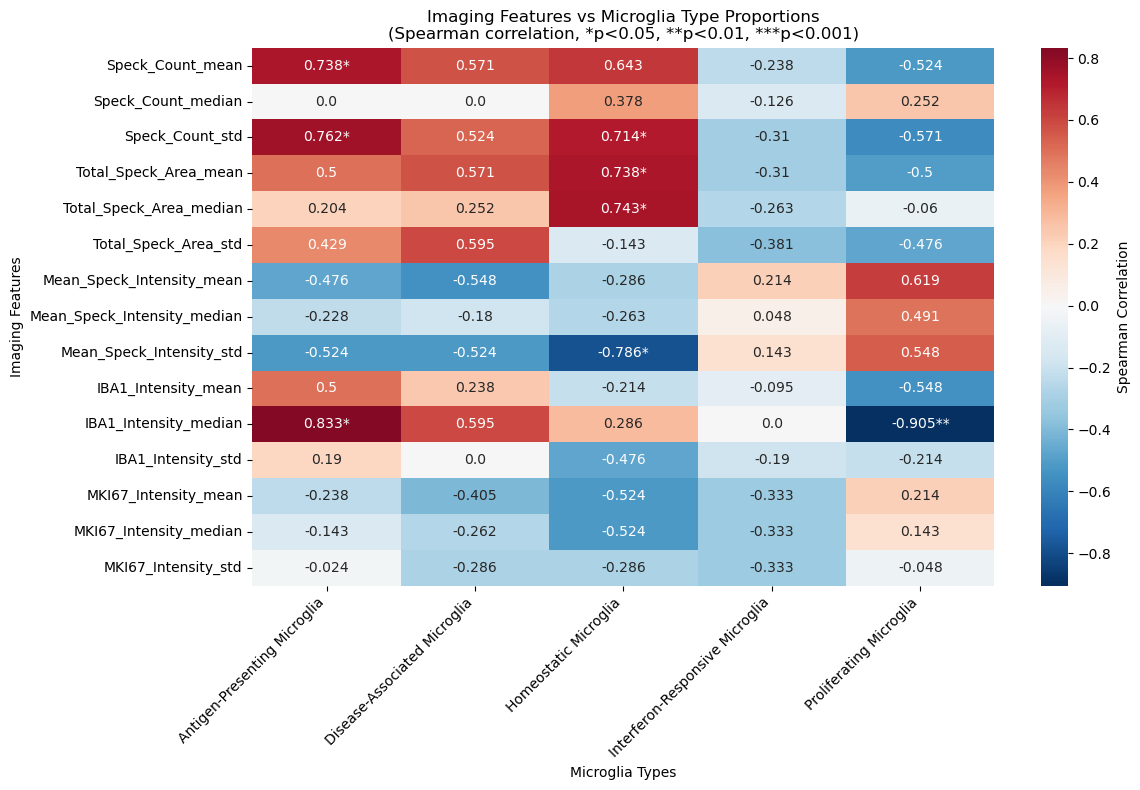


2. PREDICTING MICROGLIA TYPE PROPORTIONS

--- Predicting Antigen-Presenting Microglia Proportion ---
Linear Regression: CV R² = nan±nan, Test R² = -0.717, RMSE = 0.053
Ridge Regression: CV R² = nan±nan, Test R² = -0.562, RMSE = 0.050
Random Forest: CV R² = nan±nan, Test R² = -0.499, RMSE = 0.049


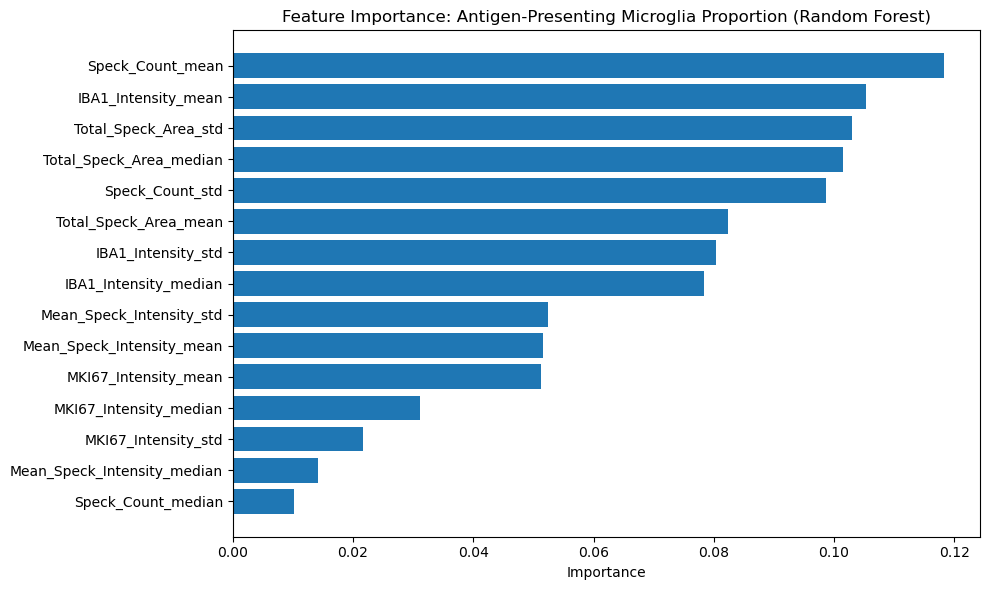


Top features for Antigen-Presenting Microglia Proportion:
                   feature  importance
0         Speck_Count_mean    0.118353
9      IBA1_Intensity_mean    0.105379
5     Total_Speck_Area_std    0.102999
4  Total_Speck_Area_median    0.101478
2          Speck_Count_std    0.098700


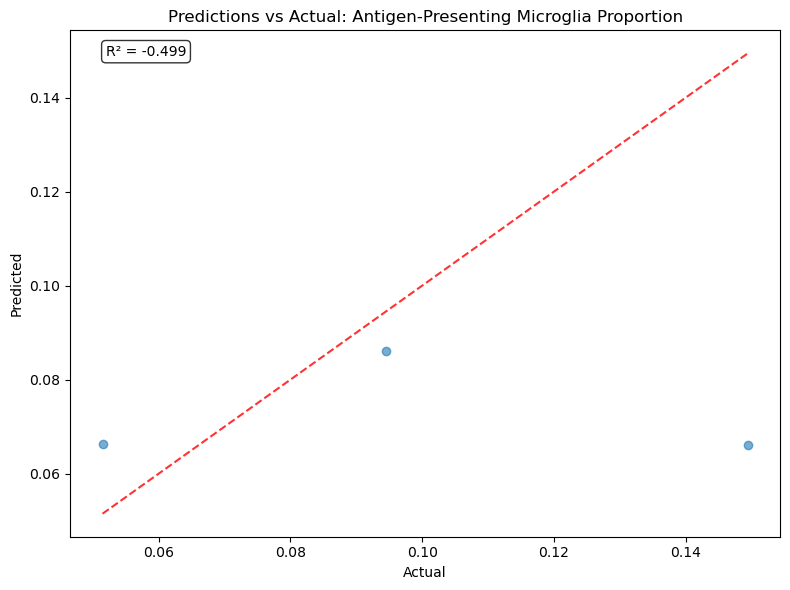


--- Predicting Disease-Associated Microglia Proportion ---
Linear Regression: CV R² = nan±nan, Test R² = -0.696, RMSE = 0.134
Ridge Regression: CV R² = nan±nan, Test R² = -0.368, RMSE = 0.120
Random Forest: CV R² = nan±nan, Test R² = -0.303, RMSE = 0.118


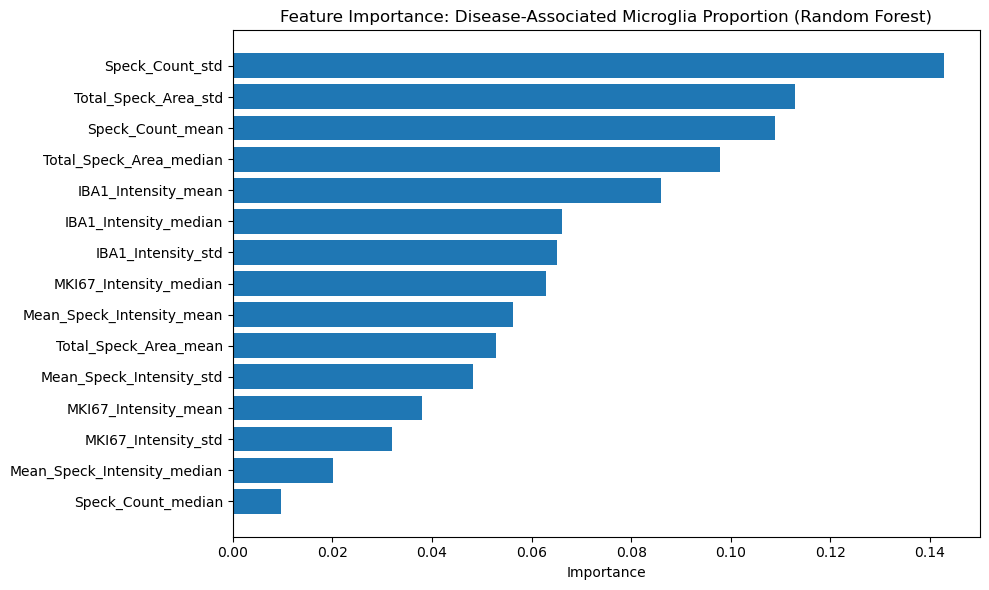


Top features for Disease-Associated Microglia Proportion:
                   feature  importance
2          Speck_Count_std    0.142885
5     Total_Speck_Area_std    0.112891
0         Speck_Count_mean    0.108924
4  Total_Speck_Area_median    0.097917
9      IBA1_Intensity_mean    0.085966


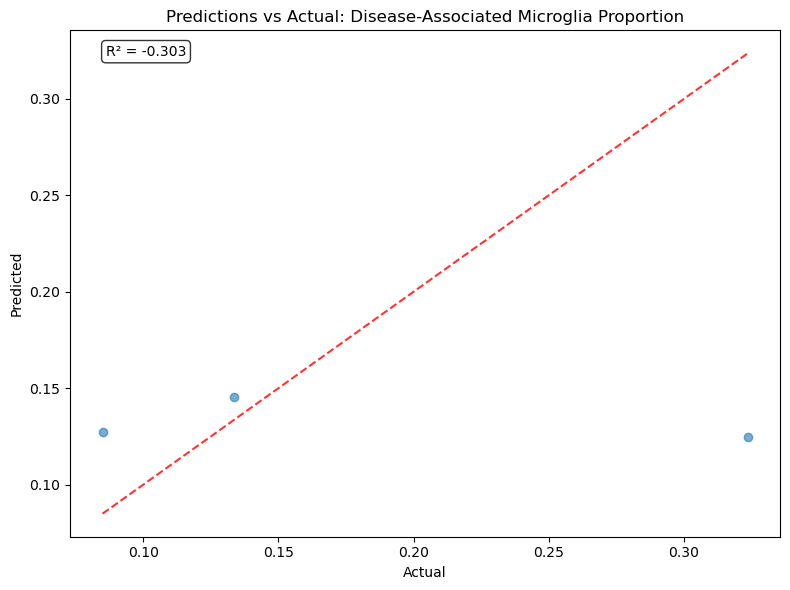


--- Predicting Homeostatic Microglia Proportion ---
Linear Regression: CV R² = nan±nan, Test R² = -1.641, RMSE = 0.120
Ridge Regression: CV R² = nan±nan, Test R² = 0.027, RMSE = 0.073
Random Forest: CV R² = nan±nan, Test R² = 0.419, RMSE = 0.056


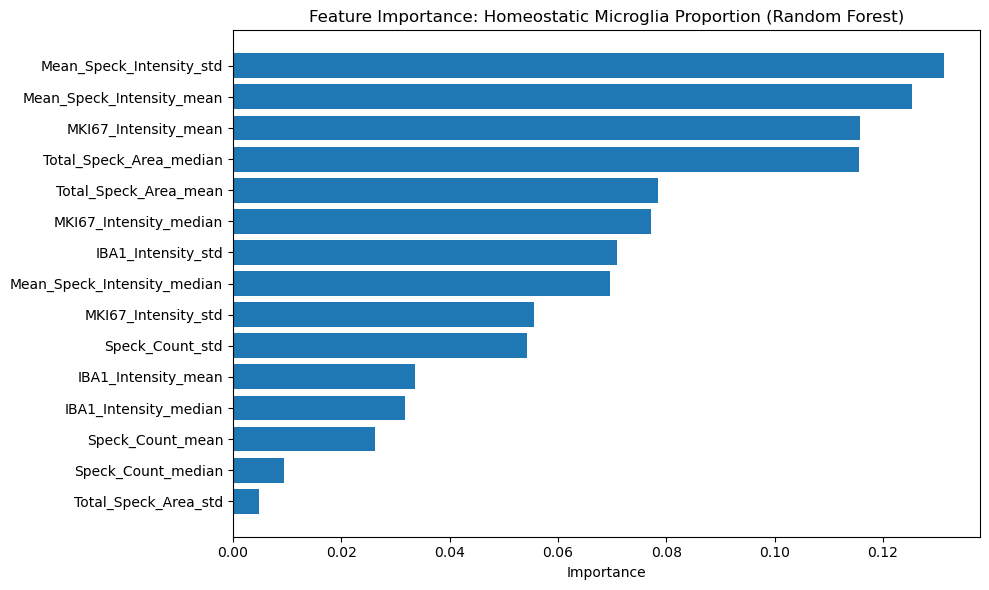


Top features for Homeostatic Microglia Proportion:
                      feature  importance
8    Mean_Speck_Intensity_std    0.131348
6   Mean_Speck_Intensity_mean    0.125376
12       MKI67_Intensity_mean    0.115743
4     Total_Speck_Area_median    0.115505
3       Total_Speck_Area_mean    0.078450


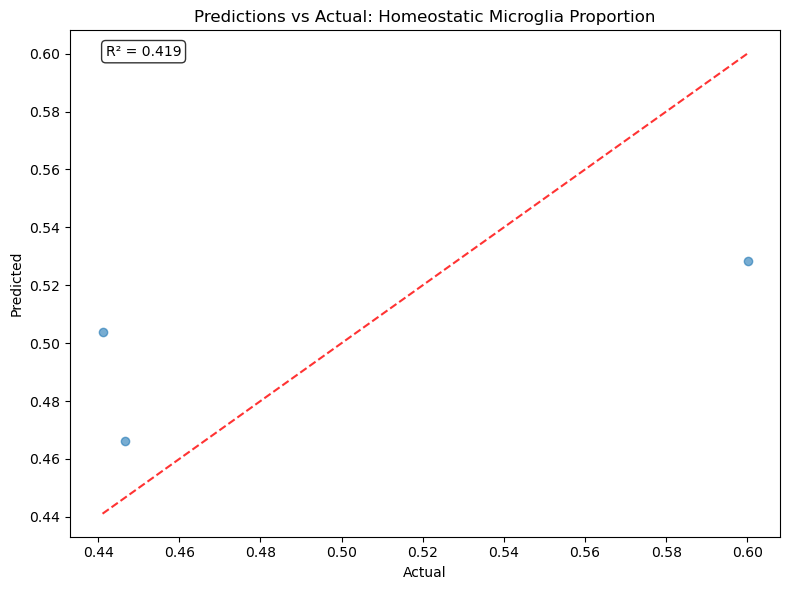


--- Predicting Interferon-Responsive Microglia Proportion ---
Linear Regression: CV R² = nan±nan, Test R² = -5.402, RMSE = 0.006
Ridge Regression: CV R² = nan±nan, Test R² = -4.975, RMSE = 0.006
Random Forest: CV R² = nan±nan, Test R² = -4.915, RMSE = 0.006


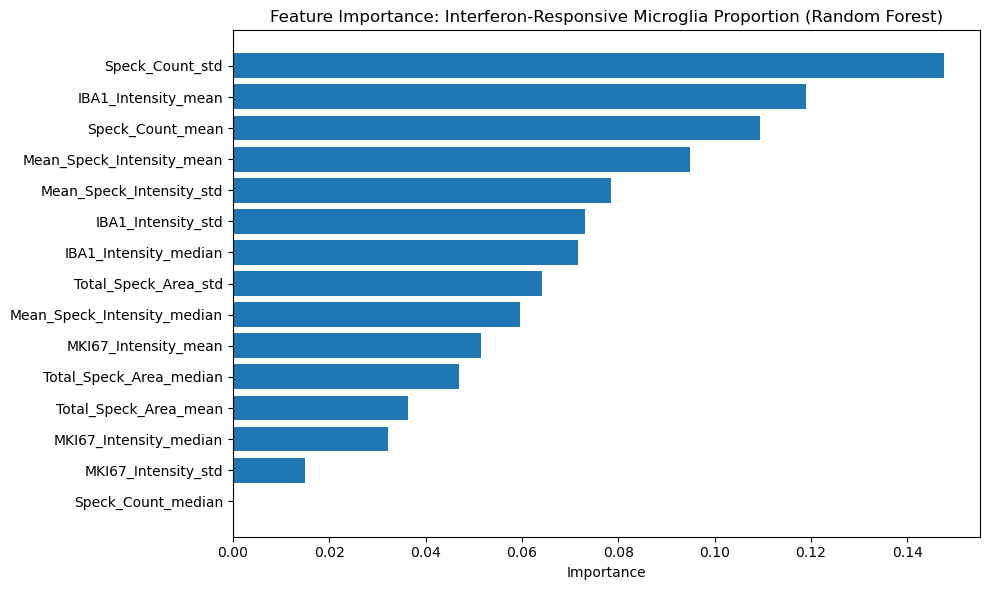


Top features for Interferon-Responsive Microglia Proportion:
                     feature  importance
2            Speck_Count_std    0.147701
9        IBA1_Intensity_mean    0.118902
0           Speck_Count_mean    0.109337
6  Mean_Speck_Intensity_mean    0.094849
8   Mean_Speck_Intensity_std    0.078454


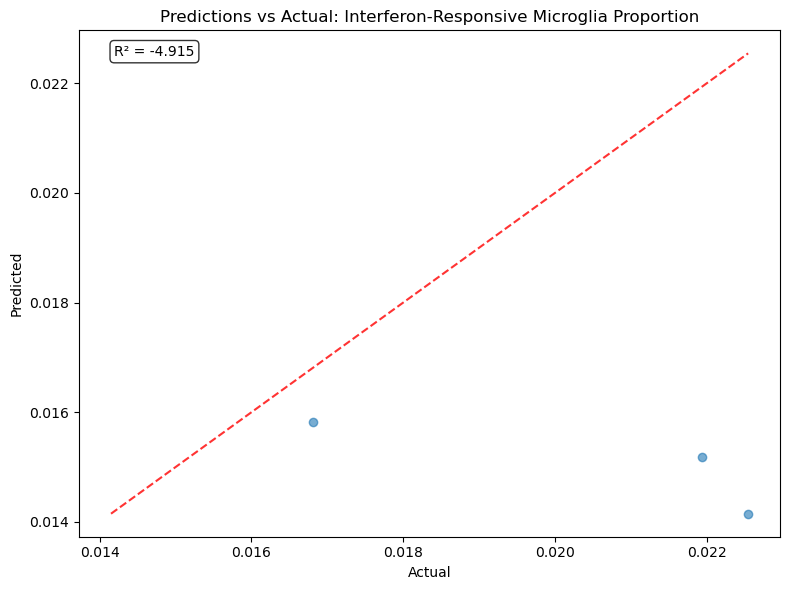


--- Predicting Proliferating Microglia Proportion ---
Linear Regression: CV R² = nan±nan, Test R² = 0.203, RMSE = 0.127
Ridge Regression: CV R² = nan±nan, Test R² = 0.204, RMSE = 0.127
Random Forest: CV R² = nan±nan, Test R² = 0.180, RMSE = 0.129


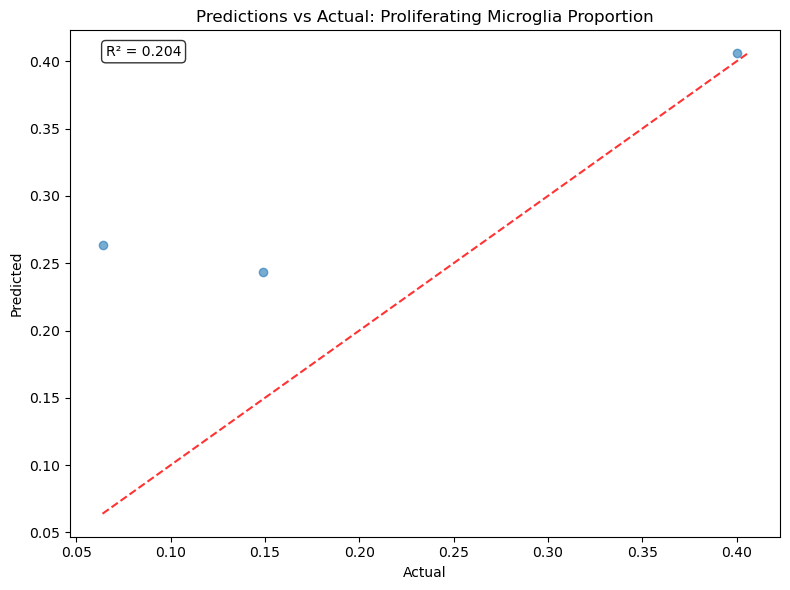


3. PREDICTING GENOTYPE FROM IMAGING

--- Predicting Genotype ---
Dataset size: 8 samples, 1 classes
Class distribution: {'KOLF': 8}
Random Forest: CV Accuracy = 1.000±0.000, Test Accuracy = 1.000

4. PREDICTING TREATMENT FROM IMAGING
Small dataset (8 samples) - using leave-one-out validation

--- Predicting Treatment (Leave-One-Out) ---
Random Forest (LOO): Accuracy = 0.000

=== ANALYSIS COMPLETE ===


In [126]:
# This should properly handle the MultiIndex column flattening and merge both datasets
results = quick_fix_and_analyze(analyzer)